In [1]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoupㅈ

In [58]:

import requests 
from bs4 import BeautifulSoup

#request 라이브러리 이용 가져오기
htmls = requests.get("https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1")

#BeautifulSoup 이용 파싱하기
bs = BeautifulSoup(htmls.content, 'html.parser')

titles = bs.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')

print(title)

<div class="Yfwt5">비트코인 $28K 돌파--부채 협상 타결, 유동성 유입 기대</div>


In [1]:
# Chrome WebDriver 실행 경로 지정
webdriver_path = '/path/to/chromedriver'

# Chrome WebDriver 인스턴스 생성
driver = webdriver.Chrome(webdriver_path)

# Google 뉴스 검색 결과 페이지 접속
driver.get('https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1')

# Selenium으로 가져온 HTML을 BeautifulSoup로 파싱
bs = BeautifulSoup(driver.page_source, 'html.parser')

# 뉴스 제목 요소 찾기
titles = bs.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')

data = {'Title': titles}
df = pd.DataFrame(data)

print("전체 개수:", len(df))

#WebDriver 종료
#driver.quit()


NameError: name 'webdriver' is not defined

In [88]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
url = "https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1"

url.format("")

driver.get(url)

In [90]:
titles = driver.find_elements(By.CLASS_NAME, 'mCBkyc')
for title in titles:
    print(title.text)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=113.0.5672.127)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00468893+48451]
	(No symbol) [0x003FB8A1]
	(No symbol) [0x00305058]
	(No symbol) [0x002ED073]
	(No symbol) [0x0034DEBB]
	(No symbol) [0x0035BFD3]
	(No symbol) [0x0034A0B6]
	(No symbol) [0x00327E08]
	(No symbol) [0x00328F2D]
	GetHandleVerifier [0x006C8E3A+2540266]
	GetHandleVerifier [0x00708959+2801161]
	GetHandleVerifier [0x0070295C+2776588]
	GetHandleVerifier [0x004F2280+612144]
	(No symbol) [0x00404F6C]
	(No symbol) [0x004011D8]
	(No symbol) [0x004012BB]
	(No symbol) [0x003F4857]
	BaseThreadInitThunk [0x775C6359+25]
	RtlGetAppContainerNamedObjectPath [0x77A67C24+228]
	RtlGetAppContainerNamedObjectPath [0x77A67BF4+180]


In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import random

title_list = []
content_list = []
date_list = []

for i in range(0, 20, 10):
    driver = webdriver.Chrome()
    # Google 뉴스 검색 결과 페이지 접속
    url = "https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1"
    driver.get(url)
    time.sleep(3)

    titles = driver.find_elements(By.CLASS_NAME, 'mCBkyc')
    for title in titles:
        title_list.append(title.text)

    contents = driver.find_elements(By.CLASS_NAME, 'GI74Re')
    for content in contents:
        content_list.append(content.text)

    dates = driver.find_elements(By.CLASS_NAME, 'WG9SHc')
    for date in dates:
        date_list.append(date.get_attribute('innerText'))

    driver.quit()

num = len(title_list)

with open("google_news_test.csv", "a", encoding="UTF-8") as csv_file:
    for i in range(num):
        csv_file.write("{}, {}, {}\n".format(title_list[i], content_list[i], date_list[i]))

print("데이터 저장이 완료되었습니다.")


데이터 저장이 완료되었습니다.


In [27]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
import random

word = input("검색하고자 하는 단어를 입력해주세요!")
url = 'https://www.google.com/search?q={}&newwindow=1&tbm=nws&ei=TUmuY5LlINeghwOfw7egDQ&start={}&sa=N&ved=2ahUKEwjSv42woqD8AhVX0GEKHZ_hDdQQ8tMDegQIBBAE&biw=763&bih=819&dpr=2.2'

page = 1

title_list = []
content_list = []
link_list = []

timesleep = random.randint(1, 10)

# 웹 드라이버 초기화
service = Service('chromedriver 경로')  # 적절한 드라이버 경로로 변경해야 합니다
driver = webdriver.Chrome(service=service)

for i in range(0, 20, 10):
    new_url = url.format(word, i)
    driver.get(new_url)
    time.sleep(3)

    print("*" * 10 + str(page) + "*" * 10)
    page = page + 1

    titles = driver.find_elements(By.CLASS_NAME, 'mCBkyc')

    for title in titles:
        title_list.append(title.text.replace(",", ""))

    contents = driver.find_elements(By.CLASS_NAME, 'GI74Re')

    for content in contents:
        content_list.append(content.text.replace(",", ""))

    links = driver.find_elements(By.CLASS_NAME, 'WlydOe')

    for link in links:
        link_list.append(link.get_attribute('href'))

num = len(title_list)
for i in range(num):
   csv = open("google_news_test.csv", "a", encoding="UTF-8")
   csv.write("{}, {}, {}\n".format(title_list[i], content_list[i], link_list[i]))
   csv.close()    
    
driver.quit()  # 웹 드라이버 종료

# 크롤링 결과 처리 및 저장 코드 작성
# 이후 title_list, content_list, link_list 등을 활용하여 원하는 작업을 수행할 수 있습니다.


검색하고자 하는 단어를 입력해주세요! 비트코인


**********1**********
**********2**********


In [16]:
import requests
from bs4 import BeautifulSoup
import csv

html = requests.get("https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1")
bs = BeautifulSoup(html.content, 'html.parser')

titles = bs.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')
contents = bs.find_all('div', class_='Y3v8qd')

In [9]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&hl=en&sxsrf=APwXEde5Bu-nwFXtG5lg4jJoKEzISP7Fvw:1685406582683&source=lnms&tbm=nws&sa=X&ved=2ahUKEwiRvqbl5Jv_AhUGEogKHfDgB58Q_AUoAnoECAEQBA&biw=1497&bih=1377&dpr=0.67"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

titles = soup.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')
contents = soup.find_all('div', class_='GI74Re nDgy9d')

with open('news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용'])
    for title, content in zip(titles, contents):
        news_title = title.find('div', class_='n0jPhd ynAwRc MBeuO nDgy9d').text.strip()
        news_content = content.find('div', class_='GI74Re nDgy9d').text.strip()
        writer.writerow([news_title, news_content])

print("뉴스 제목과 내용이 성공적으로 저장되었습니다.")


뉴스 제목과 내용이 성공적으로 저장되었습니다.


In [4]:
import requests
import csv

API_KEY = 'YOUR_API_KEY'
SEARCH_QUERY = 'bitcoin'
CSV_FILE_PATH = 'news.csv'

def get_news_data():
    url = f'https://news.googleapis.com/news/v3/search?q={SEARCH_QUERY}&key={API_KEY}'
    response = requests.get(url)
    data = response.json()
    return data.get('articles', [])

def save_data_to_csv(articles):
    with open(CSV_FILE_PATH, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['뉴스 제목', '뉴스 내용'])
        for article in articles:
            news_title = article['title']
            news_content = article['description']
            writer.writerow([news_title, news_content])

# 뉴스 데이터 가져오기
news_articles = get_news_data()

# CSV 파일에 저장
save_data_to_csv(news_articles)

print("뉴스 데이터가 성공적으로 저장되었습니다.")


[] []


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://search.naver.com/search.naver?query=비트코인&where=news"
start = 1  # 시작 페이지 번호
articles = []

while True:
    page_url = f"{url}&start={start}"
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    news_area = soup.find_all('div', class_='news_area')
    
    if not news_area:  # news_area가 비어있으면 마지막 페이지라고 가정
        break
    
    articles.extend(news_area)
    start += 10  # 다음 페이지로 이동
    
with open('news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용', '뉴스 날짜'])
    for article in articles:
        news_title_elem = article.find('a', class_='news_tit')
        news_title = news_title_elem.text.strip() if news_title_elem else ""
        
        news_content_elem = article.find('a', class_='api_txt_lines dsc_txt_wrap')
        news_content = news_content_elem.text.strip() if news_content_elem else ""
        
        news_date_elem = article.find('span', class_='info')
        news_date = news_date_elem.text.strip() if news_date_elem else ""
        
        writer.writerow([news_title, news_content, news_date])

print("뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.")


In [45]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://search.naver.com/search.naver?query=비트코인&where=news"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

articles = soup.find_all('div', class_='news_area')

with open('news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용'])
    for article in articles:
        news_title = article.find('a', class_='news_tit').text.strip()
        news_content = article.find('div', class_='news_dsc').text.strip()
        news_date_elem = article.find('span', class_='info').test.strip()
        writer.writerow([news_title, news_content])

print("뉴스 제목과 내용이 성공적으로 저장되었습니다.")


AttributeError: 'NoneType' object has no attribute 'strip'

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://search.naver.com/search.naver?query=비트코인&where=news"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

articles = soup.find_all('div', class_='news_area')

with open('news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용', '뉴스 날짜'])
    for article in articles:
        news_title_elem = article.find('a', class_='news_tit')
        news_title = news_title_elem.text.strip() if news_title_elem else ""
        
        news_content_elem = article.find('a', class_='api_txt_lines dsc_txt_wrap')
        news_content = news_content_elem.text.strip() if news_content_elem else ""
        
        news_date_elem = article.find('span', class_='info')
        news_date = news_date_elem.text.strip() if news_date_elem else ""
        
        writer.writerow([news_title, news_content, news_date])

print("뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.")


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import signal

url = "https://search.naver.com/search.naver?query=비트코인&where=news"
articles = []

def start_one():
    start = 1  # 시작 페이지 번호
    while True:
        page_url = f"{url}&start={start}"
        response = requests.get(page_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        news_area = soup.find_all('div', class_='news_area')

        if not news_area:  # news_area가 비어있으면 마지막 페이지라고 가정
            break

        articles.extend(news_area)
        start += 10  # 다음 페이지로 이동

        # 사용자 입력 감지
        if signal.getsignal(signal.SIGINT) is not signal.default_int_handler:
            print("사용자에 의해 프로그램이 중단되었습니다.")
            break
    
    if articles:
        with open('./data/news.csv', 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['뉴스 제목', '뉴스 내용', '뉴스 날짜'])
            for article in articles:
                news_title_elem = article.find('a', class_='news_tit')
                news_title = news_title_elem.text.strip() if news_title_elem else ""

                news_content_elem = article.find('a', class_='api_txt_lines dsc_txt_wrap')
                news_content = news_content_elem.text.strip() if news_content_elem else ""

                news_date_elem = article.find('span', class_='info')
                news_date = news_date_elem.text.strip() if news_date_elem else ""

                writer.writerow([news_title, news_content, news_date])

        print("뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.")
    else:
        print("수집된 뉴스가 없습니다.")

# KeyboardInterrupt 시그널 핸들러 등록
signal.signal(signal.SIGINT, signal.default_int_handler)

start_one()

In [11]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&hl=en&sxsrf=APwXEde5Bu-nwFXtG5lg4jJoKEzISP7Fvw:1685406582683&source=lnms&tbm=nws&sa=X&ved=2ahUKEwiRvqbl5Jv_AhUGEogKHfDgB58Q_AUoAnoECAEQBA&biw=1497&bih=1377&dpr=0.67"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

titles = soup.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')
contents = soup.find_all('div', class_='GI74Re nDgy9d')
dates = soup.find_all('div', class_='WG9SHc')

with open('news.csv', 'a', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용', '날짜'])
    for title, content, date in zip(titles, contents, dates):
        news_title = title.text.strip()
        news_content = content.text.strip()
        news_date = date.text.strip()
        writer.writerow([news_title, news_content, news_date])

print("뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.")


뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.


In [10]:
import pyupbit
import pandas as pd
from datetime import date, datetime
import time

btc_krw = 'KRW-BTC'
btc_krw_df = pd.DataFrame()  # Initialize with an empty DataFrame
count = 200000000

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2017, 9, 25)

while True:
    data = pyupbit.get_ohlcv(btc_krw, interval="minute1", count=count, to=date_today)
    if data is None:
        break
    if btc_krw_df.empty:
        btc_krw_df = data
    else:
        btc_krw_df = pd.concat([btc_krw_df, data])
    last_timestamp = data.index[-1]
    count += len(data)
    if len(data) < count:
        break
    time.sleep(1)

print(btc_krw_df.shape)
print(btc_krw_df)


KeyboardInterrupt: 

In [11]:
import pyupbit
import pandas as pd
from datetime import date, datetime
import time

# API 요청 속도 제한
REQUESTS_PER_SECOND = 10

btc_krw = 'KRW-BTC'
btc_krw_df = pd.DataFrame()  # Initialize with an empty DataFrame
count = 2000000

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2017, 9, 25)

# API 요청 속도 제한을 고려하여 데이터 가져오기
request_count = 0  # API 요청 횟수 초기화
start_time = time.time()  # 시작 시간 기록

while True:
    # 요청 횟수가 제한에 도달한 경우, 일정 시간만큼 대기
    if request_count >= REQUESTS_PER_SECOND:
        elapsed_time = time.time() - start_time
        if elapsed_time < 1:
            time.sleep(1 - elapsed_time)
        request_count = 0  # 요청 횟수 초기화
        start_time = time.time()  # 시작 시간 갱신

    data = pyupbit.get_ohlcv(btc_krw, interval="minute1", count=count, to=date_today)
    if data is None:
        break
    if btc_krw_df.empty:
        btc_krw_df = data
    else:
        btc_krw_df = pd.concat([btc_krw_df, data])
        last_timestamp = data.index[-1]
        count += 200
    if len(data) < count:
        break
    
    request_count += 1  # API 요청 횟수 증가

print(btc_krw_df.shape)
print(btc_krw_df)


KeyboardInterrupt: 

In [ ]:
import pyupbit
import pandas as pd
from datetime import date, datetime
import time

btc_krw = 'KRW-BTC'
btc_krw_df = pd.DataFrame() # Initialize with an empty DataFrame
batch_size = 10000 # Number of data to fetch in each API request
total_count = 2000000 # Total number of data to fetch
date_today = date.today().strftime("%Y-%m-%d")
date_start = datetime(2017, 9, 25)

num_batches = total_count // batch_size # Calculate the number of batches

for i in range(num_batches):
    count = batch_size # Set count for current batch
    data = pyupbit.get_ohlcv(btc_krw, interval="minute1", count=count, to=date_today)
    if data is None:
        break
    if btc_krw_df.empty:
        btc_krw_df = data
    else:
    btc_krw_df = pd.concat([btc_krw_df, data])
    last_timestamp = data.index[-1]
    time.sleep(1) # Pause for 1 second between API requests

    remaining_count = total_count % batch_size # Calculate the remaining count for the last batch
    if remaining_count > 0:
        count = remaining_count # Set count for the last batch
        data = pyupbit.get_ohlcv(btc_krw, interval="minute1", count=count, to=date_today)
    if data is not None:
        btc_krw_df = pd.concat([btc_krw_df, data])

print(btc_krw_df.shape)
print(btc_krw_df)

In [ ]:
import pyupbit
import multiprocessing

def fetch_ohlcv(ticker):
    count = 10000000
    df = pyupbit.get_ohlcv(ticker=ticker, interval="minute1", count=count)
    return df

if __name__ == '__main__':
    ticker = "KRW-XRP"
    num_processes = 100  # 병렬 처리할 프로세스 수

    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(fetch_ohlcv, [ticker] * num_processes)
    pool.close()
    pool.join()

    # 결과 합치기
    df = pd.concat(results)

    print(df)


In [ ]:
print(df)

In [35]:
import pyupbit

df = pyupbit.get_ohlcv("KRW-BTC", interval="minute1", count = 200)
print(df)

                           open        high         low       close    volume   
2023-06-07 06:42:00  35671000.0  35707000.0  35670000.0  35704000.0  7.306801  \
2023-06-07 06:43:00  35704000.0  35704000.0  35680000.0  35683000.0  4.788275   
2023-06-07 06:44:00  35683000.0  35696000.0  35680000.0  35683000.0  1.666518   
2023-06-07 06:45:00  35683000.0  35694000.0  35682000.0  35693000.0  1.400808   
2023-06-07 06:46:00  35684000.0  35694000.0  35681000.0  35693000.0  3.602656   
...                         ...         ...         ...         ...       ...   
2023-06-07 09:57:00  35805000.0  35808000.0  35800000.0  35801000.0  2.179468   
2023-06-07 09:58:00  35800000.0  35800000.0  35778000.0  35788000.0  2.355523   
2023-06-07 09:59:00  35788000.0  35788000.0  35762000.0  35766000.0  2.184552   
2023-06-07 10:00:00  35779000.0  35790000.0  35765000.0  35788000.0  5.842028   
2023-06-07 10:01:00  35789000.0  35804000.0  35788000.0  35798000.0  7.825438   

                           

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, Reshape

data = pd.read_csv('../data/data.csv')

# 기존 CSV 파일 읽어오기
existing_data = pd.read_csv('../data/bitcoin2023.csv')
# 신규 데이터
new_data = pd.DataFrame(data)

#기존 데이터를 신규데이터랑 합치기
marged_data = pd.concat([existing_data, new_data])

# 데이터 프레임으로 변환
df = pd.DataFrame(marged_data)

print(df)

   candle_date_time_kst  opening_price  high_price   low_price  trade_price   
0   2023-05-30T19:15:00     37213000.0  37213000.0  37200000.0   37203000.0  \
1   2023-05-30T19:16:00     37203000.0  37215000.0  37200000.0   37215000.0   
2   2023-05-30T19:17:00     37216000.0  37238000.0  37215000.0   37238000.0   
3   2023-05-30T19:18:00     37237000.0  37248000.0  37235000.0   37247000.0   
4   2023-05-30T19:19:00     37247000.0  37253000.0  37247000.0   37251000.0   
..                  ...            ...         ...         ...          ...   
25  2023-06-01T17:13:00     35962000.0  35970000.0  35962000.0   35962000.0   
26  2023-06-01T17:14:00     35964000.0  35977000.0  35963000.0   35964000.0   
27  2023-06-01T17:15:00     35977000.0  35978000.0  35965000.0   35968000.0   
28  2023-06-01T17:16:00     35966000.0  35978000.0  35964000.0   35964000.0   
29  2023-06-01T17:17:00     35963000.0  35980000.0  35962000.0   35963000.0   

    candle_acc_trade_price  candle_acc_trade_volume

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, Reshape, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# 데이터 전처리
df['candle_date_time_kst'] = pd.to_datetime(df['candle_date_time_kst'], format='%Y-%m-%dT%H:%M:%S')
df.set_index('candle_date_time_kst', inplace=True)

# 데이터 정규화
scaler = MinMaxScaler()
scale_cols = ['trade_price']
scaled = scaler.fit_transform(df[scale_cols])
test_scaled = scaler.transform(df[scale_cols])

# 데이터 분할
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# 시퀀스 길이
sequence_length = 30

# 데이터셋 생성
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length][0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(scaled, sequence_length)
X_test, y_test = create_dataset(test_scaled, sequence_length)

# CNN 모델과 LSTM 모델

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.1))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(LSTM(units=64, activation='tanh'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# 모델 학습하기
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

# 모델 평가하기
score = model.evaluate(X_test, y_test)

# 모델 예측하기
y_pred = model.predict(X_train)

def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

# 예측 결과 역변환
y_pred_original = reverse_min_max_scaling(df['trade_price'], y_pred)

# 미래 날짜 계산
current_date = df.index[-1].to_pydatetime()
future_dates = [current_date + datetime.timedelta(hours=i+1) for i in range(1)]

# 예측 결과를 저장할 딕셔너리
y_pred_dict = {
    'trade_date': future_dates,
    'prediction': y_pred_original.flatten().tolist()
}

print(y_pred_dict)


Epoch 1/100
25982/25982 [==============================] - 328s 13ms/step - loss: 1.8469e-04 - val_loss: 2.2698e-05
Epoch 2/100
25982/25982 [==============================] - 326s 13ms/step - loss: 2.0783e-05 - val_loss: 1.9680e-05
Epoch 3/100
25982/25982 [==============================] - 322s 12ms/step - loss: 1.6397e-05 - val_loss: 1.2977e-05
Epoch 4/100
25982/25982 [==============================] - 321s 12ms/step - loss: 1.4706e-05 - val_loss: 1.2869e-05
Epoch 5/100
25982/25982 [==============================] - 322s 12ms/step - loss: 1.3310e-05 - val_loss: 1.2741e-05
Epoch 6/100
25982/25982 [==============================] - 325s 13ms/step - loss: 1.2289e-05 - val_loss: 1.2396e-05
Epoch 7/100
25982/25982 [==============================] - 334s 13ms/step - loss: 1.1317e-05 - val_loss: 1.0426e-05
Epoch 8/100
25982/25982 [==============================] - 326s 13ms/step - loss: 1.0644e-05 - val_loss: 1.4576e-05
Epoch 9/100
25982/25982 [==============================] - 315s 12ms/ste

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [65]:
model.save("../my_model.h5")

(1039273, 7, 6)
(1039273, 7, 6)
(1039273,)
(1039273,)


In [78]:
print(y_pred_original)

[[20322524.]
 [20322572.]
 [20322642.]
 ...
 [20357144.]
 [20357692.]
 [20357542.]]


In [1]:
#다음 뉴스 클로링
import requests
from bs4 import BeautifulSoup as bs

In [2]:
url = "https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&p=1"
res = requests.get(url)
res

<Response [200]>

In [3]:
list = []
soup = bs(res.text, 'html')
ul = soup.find("div", {"class":"wrap_cont"})

titles = ul.findAll("a", {"class":"tit_main fn_tit_u"})
days = ul.findAll("span", {"class":"f_nb"})  # 클래스를 "cont_info"로 수정합니다.

for title, day in zip(titles, days):
    title_text = title.text.strip()
    day_text = day.text.strip()
    data = (title_text, day_text)
    list.append(data)

print(len(list))  # links의 개수 출력

for item in list:
    print(item)

AttributeError: 'NoneType' object has no attribute 'findAll'

In [52]:
print(item)

('[속보] 우크라 대반격 시작 러시아 본토 진격… 뉴욕증시 비트코인 흔들', '10시간전')


In [ ]:
# 감성분석 및 가격변동 예측

In [74]:
import pandas_datareader as wb
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [75]:
import pyupbit

df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=200)
# 결측치 제거
df = df.dropna()

# 날짜 정보를 가져와서 새로운 열로 추가
dates = df.index
df['Date'] = dates

# 인덱스를 'Dates' 열로 설정
df = df.set_index('Date')


# 새로운 컬럼 추가
df['Price'] = 0
for i in range(0, 30):
    if df['close'][i] < df['close'][i+1]:
        df['Price'][i] = 1
    else:
        df['Price'][i] = 0

# 파일 저장
df.to_csv('upbit_data.csv')
print(df)

                           open        high         low       close   
Date                                                                  
2022-11-20 09:00:00  23082000.0  23128000.0  22651000.0  22788000.0  \
2022-11-21 09:00:00  22763000.0  22810000.0  22000000.0  22220000.0   
2022-11-22 09:00:00  22220000.0  22719000.0  22031000.0  22584000.0   
2022-11-23 09:00:00  22599000.0  23121000.0  22525000.0  22985000.0   
2022-11-24 09:00:00  22985000.0  23220000.0  22566000.0  22738000.0   
...                         ...         ...         ...         ...   
2023-06-03 09:00:00  36089000.0  36102000.0  35801000.0  35888000.0   
2023-06-04 09:00:00  35888000.0  36146000.0  35820000.0  35865000.0   
2023-06-05 09:00:00  35894000.0  35896000.0  33825000.0  34298000.0   
2023-06-06 09:00:00  34299000.0  35993000.0  33580000.0  35852000.0   
2023-06-07 09:00:00  35855000.0  35993000.0  35572000.0  35616000.0   

                          volume         value  Price  
Date                

C:\Users\SW\AppData\Local\Temp\ipykernel_2944\420600921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 0
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\420600921.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\420600921.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\420600921

In [76]:
price_data = pd.read_csv('upbit_data.csv')
df_0 = price_data[price_data['Price']==0]['Date']
date_0 = []
for i in range(0, len(df_0)):
    date_0.append(str(df_0.tolist()[i])[:10].replace('-',''))
    
print(date_0)

['20221120', '20221123', '20221124', '20221125', '20221126', '20221127', '20221130', '20221201', '20221202', '20221204', '20221206', '20221208', '20221209', '20221210', '20221214', '20221215', '20221216', '20221217', '20221218', '20221220', '20221221', '20221222', '20221223', '20221224', '20221225', '20221226', '20221227', '20221228', '20221229', '20221230', '20221231', '20230101', '20230102', '20230103', '20230104', '20230105', '20230106', '20230107', '20230108', '20230109', '20230110', '20230111', '20230112', '20230113', '20230114', '20230115', '20230116', '20230117', '20230118', '20230119', '20230120', '20230121', '20230122', '20230123', '20230124', '20230125', '20230126', '20230127', '20230128', '20230129', '20230130', '20230131', '20230201', '20230202', '20230203', '20230204', '20230205', '20230206', '20230207', '20230208', '20230209', '20230210', '20230211', '20230212', '20230213', '20230214', '20230215', '20230216', '20230217', '20230218', '20230219', '20230220', '20230221', '20

In [77]:
df_1 = price_data[price_data['Price']==1]['Date']
date_1 = []
for i in range(0,len(df_1)):
    date_1.append(str(df_1.tolist()[i])[:10].replace('-',''))
print(date_1)

['20221121', '20221122', '20221128', '20221129', '20221203', '20221205', '20221207', '20221211', '20221212', '20221213', '20221219']


In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

result_list = []
error_cnt = 0

def daum_bitcoin_news_title(dates):
    base_url = 'https://search.daum.net/search?w=news&q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sort=recency&cluster=n&DA=STC&dc=STC&pg=1&r=1&p=1&rc=1&at=more&sd={}&ed={}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }

    for date in dates:
        for page in range(1, 3):
            url = base_url.format(page, date)
            res = requests.get(url, headers=headers)
            if res.status_code == 200:
                soup = BeautifulSoup(res.text, 'html.parser')
                title_list = soup.select('ul.list_news2 li')
                for title in title_list:
                    try:
                        news_title = title.select_one('div.wrap_cont a').text.strip()
                        result_list.append([news_title])
                    except:
                        error_cnt += 1
                        
print(result_list)

[]


In [79]:
daum_bitcoin_news_title(date_0)
title_df_0 = pd.DataFrame(result_list, columns=['news_title'])
title_df_0['stock_price_fluctuation'] = 0

print(title_df_0)

Empty DataFrame
Columns: [news_title, stock_price_fluctuation]
Index: []


In [80]:
result_list = []
error_cnt = 0
daum_bitcoin_news_title(date_1)
title_df_1 = pd.DataFrame(result_list, columns=['news_title'])
title_df_1['stock_price_fluctuation'] = 1
print(title_df_1)

Empty DataFrame
Columns: [news_title, stock_price_fluctuation]
Index: []


In [81]:
title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('daum_bit_data.csv', index=False, encoding='utf-8')
title_df

,news_title,stock_price_fluctuation


In [100]:
import pyupbit
import requests
from bs4 import BeautifulSoup
import pandas as pd

df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=200)
df = df.dropna()
dates = df.index
df['Date'] = dates
df = df.set_index('Date')

df['Price'] = 0
for i in range(0, 30):
    if df['close'][i] < df['close'][i+1]:
        df['Price'][i] = 1
    else:
        df['Price'][i] = 0

df.to_csv('upbit_data.csv')
print(df)

price_data = pd.read_csv('upbit_data.csv')
df_0 = price_data[price_data['Price'] == 0]['Date']
date_0 = [str(date)[:10].replace('-', '') for date in df_0]
print(date_0)

df_1 = price_data[price_data['Price'] == 1]['Date']
date_1 = [str(date)[:10].replace('-', '') for date in df_1]
print(date_1)

def daum_bitcoin_news_title(dates):
    error_cnt=0  # 전역 변수로 지정
    
    base_url = 'https://search.daum.net/search?w=news&q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sort=recency&cluster=n&DA=STC&dc=STC&pg=1&r=1&p=1&rc=1&at=more&sd={}&ed={}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }

    result_list = []  # 결과 리스트 초기화

    for date in dates:
        for page in range(1, 3):
            url = base_url.format(date, page)
            res = requests.get(url, headers=headers)
            if res.status_code == 200:
                soup = BeautifulSoup(res.text)
                title_list = soup.select('ul.list_news2 li')
                for title in title_list:
                    try:
                        news_title = title.select_one('div.wrap_cont a').text.strip()
                        result_list.append([news_title])
                    except:
                        error_cnt += 1
        print(f"Error count: {error_cnt}")  # 추가
    
daum_bitcoin_news_title(date_0)
title_df_0 = pd.DataFrame(result_list, columns=['news_title'])
title_df_0['stock_price_fluctuation'] = 0
print(title_df_0)

result_list = []  # result_list 초기화

daum_bitcoin_news_title(date_1)
title_df_1 = pd.DataFrame(result_list, columns=['news_title'])
title_df_1['stock_price_fluctuation'] = 1
print(title_df_1)

title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('daum_bit_data.csv', index=False, encoding='utf-8')
print(title_df)


C:\Users\SW\AppData\Local\Temp\ipykernel_2944\3313475576.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 0
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\3313475576.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\3313475576.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\331347

                           open        high         low       close   
Date                                                                  
2022-11-20 09:00:00  23082000.0  23128000.0  22651000.0  22788000.0  \
2022-11-21 09:00:00  22763000.0  22810000.0  22000000.0  22220000.0   
2022-11-22 09:00:00  22220000.0  22719000.0  22031000.0  22584000.0   
2022-11-23 09:00:00  22599000.0  23121000.0  22525000.0  22985000.0   
2022-11-24 09:00:00  22985000.0  23220000.0  22566000.0  22738000.0   
...                         ...         ...         ...         ...   
2023-06-03 09:00:00  36089000.0  36102000.0  35801000.0  35888000.0   
2023-06-04 09:00:00  35888000.0  36146000.0  35820000.0  35865000.0   
2023-06-05 09:00:00  35894000.0  35896000.0  33825000.0  34298000.0   
2023-06-06 09:00:00  34299000.0  35993000.0  33580000.0  35852000.0   
2023-06-07 09:00:00  35855000.0  35993000.0  35372000.0  35513000.0   

                          volume         value  Price  
Date                

KeyboardInterrupt: 

In [106]:
!pip install requests beautifulsoup4 pandas pyupbit


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import csv

list = []

for page in range(1, 10000):  # 페이지 범위 설정 (1부터 5까지)
    url = f"https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&p={page}"
    res = requests.get(url)
    soup = bs(res.text, 'html')
    uls = soup.findAll("ul", {"class":"list_news"})

    for ul in uls:
        titles = ul.findAll("a", {"class":"tit_main fn_tit_u"})
        days = ul.findAll("span", {"class":"f_nb"})

        for title, day in zip(titles, days):
            title_text = title.text.strip()
            day_text = day.text.strip()
            data = (title_text, day_text)
            list.append(data)

# CSV 파일에 저장
filename = "news_data.csv"
with open(filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Day"])  # 헤더 쓰기

    for item in list:
        writer.writerow(item)

print(f"데이터가 {filename} 파일에 저장되었습니다.")


KeyboardInterrupt: 

In [4]:
import pandas as pd
bit_news = pd.read_csv('news_data.csv')
title_list = bit_news['Title'].tolist()
title_text = '\n'.join(title_list)


'[속보] 우크라 대반격 시작 러시아 본토 진격… 뉴욕증시 비트코인 흔들\n비트코인, 3500만원대 깰까…FOMC 관망\n비트코인, 2만7천달러대 횡보..."FOMC 주목" [코인브리핑]\n2만7000달러에 갇힌 비트코인…美 CPI·FOMC 주목\n[Weekly Coin] ‘부채한도’ 불안 털어냈지만...반등 힘든 비트코인\n비트멕스 공동 창업자 "비트코인, 올 하반기 강세장 시작 전망"\n[코인시황] 비트코인 상승 2만7255달러, 리플 4% 급등 이더리움↑1901달러\n"안전자산 아닌데…" 금 뛸 때 덩달아 오른 비트코인\n미증시 랠리에도 비트코인 0.5% 하락, 2만7000달러 붕괴\n[크립토 브리핑] 3500만원대에 달라 붙은 비트코인...리플은 700원 돌파\n김남국 후폭풍?...비트코인 거래대금 두달만에 반토막\n美 부채한도 타결에 상승한 비트코인 "2만8000달러 핵심 저항선" [강민승의 트레이드나우]\n美 하원 부채한도 합의 통과에 비트코인 ‘하락’…왜?\n가상자산 첫 거래 기념하는 ‘비트코인 피자데이’\n금 가격과 연동하는 \'비트코인\'…안전자산으로 격상?\n러시아 정부 관리, 비트코인으로 2800만 달러 상당 뇌물 수수 혐의\n이더리움 NFT→비트코인 NFT로 바꿔주는 표준 등장\n미 디폴트 ‘피난처’ 찾는 투자자들…금, 미국채, 비트코인 그리고 일본 증시?\n비트코인 3500만 원대 유지, 바이낸스 시장 점유율 43%로 하락 소식\n비트코인 올해 70% 폭등...월가 전문가들이 내다본 하반기 방향성\n비트코인 3500만 원대 유지, 미 블룸버그 분석가 가상화폐 약세 전망\n美증시와 디커플링되는 비트코인…中주도 추세로 전환되나 [한경 코알라]\n비트코인 가격 변동을 알고 싶으면 금 시세를 보라?\n美 부채 한도 합의에 비트코인도 반짝 상승…상승분 일부 반납[코인브리핑]\n비트코인, 챗GPT에 밀렸다\n美부채협상 타결, 비트코인 한때 2만8000달러 돌파\n비트코인 인스크립션 1000만 개 돌파\n하반기, 비트코인 가격도 상승세 이어갈까\n[

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pyupbit
import os

df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=100)
df = df.dropna()
df.index = df.index.strftime('%Y-%m-%dT%H:%M:%S')
dates = df.index # 인덱스에 dates 저장 날짜
df['Date'] = dates
df = df.set_index('Date') #  'Date' 열을 인덱스로 설정합니다.

df['labal'] = 0
for i in range(0, 30):
    if df['close'][i] < df['close'][i+1]:
        df.loc[df.index[i], 'Price'] = 1
    else:
        df.loc[df.index[i], 'Price'] = 0

df.to_csv('naver_bit_data.csv')
print(df)

price_data = pd.read_csv('naver_bit_data.csv')

df_0 = price_data[price_data['Price'] == 0]['Date']
date_0 = [str(date)[:10].replace('-', '') for date in df_0]
print(date_0)

df_1 = price_data[price_data['Price'] == 1]['Date']
date_1 = [str(date)[:10].replace('-', '') for date in df_1]
print(date_1)

def get_news_content(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    content = soup.select_one('#articleBodyContents').get_text(separator=' ', strip=True)
    return content

def naver_bitcoin_news(dates):
    error_cnt = 0
    base_url = 'https://search.naver.com/search.naver?where=news&query=비트코인&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={}&de={}&mynews=1&office_type=1&office_section_code=1&news_office_checked=1001&nso=so:r,p:from{}to{}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }

    result_list = []

    for date in dates:
        start_date = '2023-5-27'
        end_date = '2023-06-07'
        url = base_url.format(start_date, end_date, start_date, end_date)
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            soup = BeautifulSoup(res.text, 'html.parser')
            title_list = soup.select('ul.list_news li')
            for title in title_list:
                try:
                    news_title = title.select_one('a.news_tit').text.strip()
                    result_list.append([news_title])
                except:
                    error_cnt += 1

    return result_list

result_list_0 = naver_bitcoin_news(date_0)
title_df_0 = pd.DataFrame(result_list_0, columns=['news_title'])
title_df_0['Date'] = 
#title_df_0['stock_price_fluctuation'] = 0
print(title_df_0)

result_list_1 = naver_bitcoin_news(date_1)
title_df_1 = pd.DataFrame(result_list_1, columns=['news_title'])
title_df_1['Date']
#title_df_1['stock_price_fluctuation'] = 1
print(title_df_1)

title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('naver_bit_data.csv', index=False, encoding='utf-8', mode='a', header=not os.path.exists('naver_bit_data.csv'))
print(title_df)


                           open        high         low       close   
Date                                                                  
2023-03-01 09:00:00  31024000.0  31600000.0  30805000.0  31106000.0  \
2023-03-02 09:00:00  31106000.0  31284000.0  30800000.0  31109000.0   
2023-03-03 09:00:00  31109000.0  31135000.0  29508000.0  29709000.0   
2023-03-04 09:00:00  29710000.0  29907000.0  29638000.0  29838000.0   
2023-03-05 09:00:00  29837000.0  30097000.0  29650000.0  29982000.0   
...                         ...         ...         ...         ...   
2023-06-04 09:00:00  35888000.0  36146000.0  35820000.0  35865000.0   
2023-06-05 09:00:00  35894000.0  35896000.0  33825000.0  34298000.0   
2023-06-06 09:00:00  34299000.0  35993000.0  33580000.0  35852000.0   
2023-06-07 09:00:00  35855000.0  35993000.0  34797000.0  34952000.0   
2023-06-08 09:00:00  34953000.0  35159000.0  34872000.0  34873000.0   

                          volume         value  Price  
Date                

KeyError: 'Date'

In [1]:
import pandas as pd
from konlpy.tag import Twitter
import nltk

bit_news = pd.read_csv('naver_bit_data.csv')
title_list = bit_news['news_title'].tolist()
title_text = ''
for each_line in title_list:
    title_text = title_text + each_line + '\n'
title_text

t = Twitter() #형태소
tokens_ko = t.morphs(title_text)
ko = nltk.Text(tokens_ko)
print(len(ko.tokens)) # 토큰 전체 개수
print(len(set(ko.tokens))) # 토큰 unique 개수

C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


28800
90


[('\n', 2000), (',', 1600), ('비트코인', 1400), ('코인', 800), ('…', 800), ('美', 600), ('SEC', 600), ('바이', 600), ('낸스', 600), ('제소', 600), ('(', 600), ('종합', 600), (')', 600), ('하락', 600), ('에', 600), ('·', 400), ('CEO', 400), ('2', 400), ('김', 400), ('남국', 400), ("'", 400), ('이어', 200), ('베이스', 200), ('도', 200), ('은', 200), ('반등', 200), ('2만', 200), ('6천달러', 200), ('하', 200), ('회', 200), ('보', 200), ('미', 200), ('한', 200), ('챗', 200), ('GPT', 200), ('밀린', 200), ('올해', 200), ('들어', 200), ('월', 200), ('기준', 200), ('첫', 200), ('스', 200), ('테이블', 200), ('발', 200), ('행사', 200), ('테더', 200), ('3천억원', 200), ('어치', 200), ('매입', 200), ('해외', 200), ('에도', 200), ('보유', 200), ('?…', 200), ('5억원', 200), ('이상', 200), ('이면', 200), ('내달', 200), ('신고', 200), ('해야', 200), ('논란', 200), ('수사', 200), ('가능성', 200), ('P', 200), ('E', 200), ('띄우던', 200), ('게임', 200), ('계', 200), ('긴장', 200), ('거래소', 200), ('연내', 200), ('토큰', 200), ('증권', 200), ('시장', 200), ('문', 200), ('연', 200), ('다', 200), ('이', 200), ('달말', 20

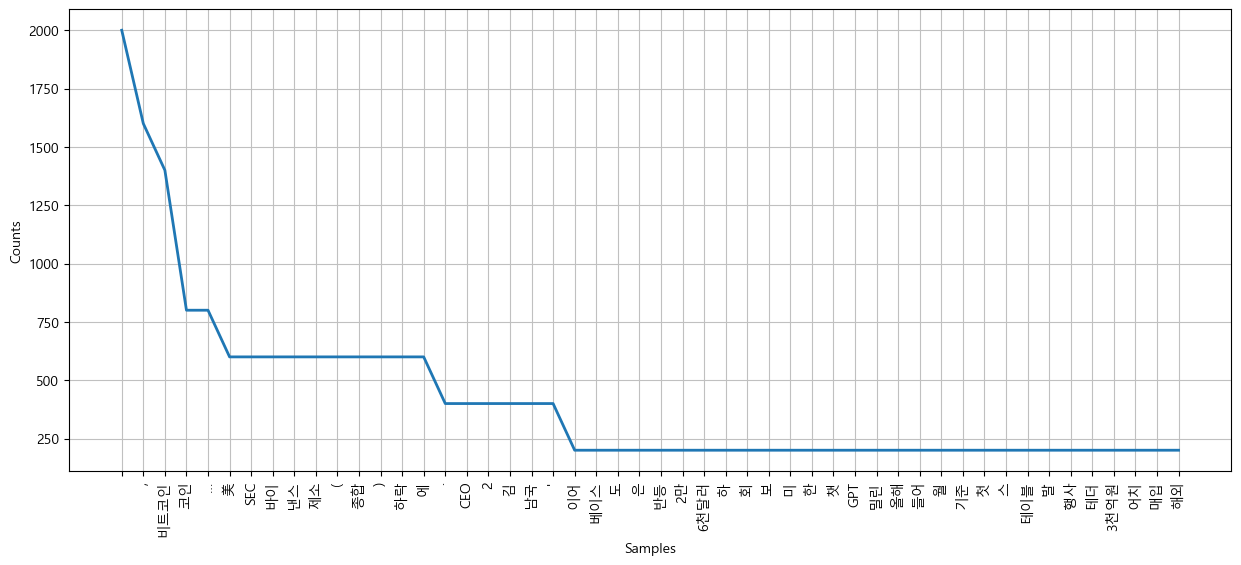

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
print(ko.vocab().most_common(200))

stop_words = [
    [('비트코인', 2700), ('\n', 2499), (',', 2032), ("'", 1970), ('..', 1393), ('기대', 856), ('美', 813), ('[', 760), (']', 760), ('·', 736), ('은', 727), ('대형주', 689), ('부채', 665), ('협상', 595), ('"', 593), ('상승', 592), ('선', 562), ('주목', 541), ('FOMC', 534), ('증시', 529), ('와', 525), ('전자', 519), ('…', 511), ('코인', 490), ('한도', 473), ('시', 417), ('황', 406), ('횡보', 378), ('가격', 373), ('은행', 365), ('장', 362), ('주', 361), ('중', 350), ('삼성', 350), ('주춤', 349), ('필요', 349), ("',", 346), ('순환', 346), ('순', 345), ('환매', 343), ('다우', 343), ('골디락스', 342), ('2만', 299), ('하락', 264), ('?', 213), ('디폴트', 211), ('의', 210), ('7000달러', 208), ('뉴욕증시', 206), ('금리', 205), ('달러', 199), ('속보', 197), ('3600만원', 197), ('회복', 194), ('인상', 194), ('강세', 192), ('BTC', 192), ('적', 192), ('것', 190), ('우려', 189), ('27', 188), ('성', 188), ('타결', 187), ('오늘', 187), ('금', 186), ('앞두고', 186), ('k', 183), ('예상', 181), ('(', 181), (')', 181), ('vs', 181), ('발표', 180), ('에', 178), ('엔비디아', 178), ('뚝', 178), ('알트', 177), ('지표', 177), ('바이든', 177), ('등락', 177), ('큰', 176), ('보합', 176), ('폭발', 176), ('안정', 176), ('고용', 175), ('약', 175), ('국채', 175), ('포함', 174), ('주말', 173), ('곧', 173), ('추천', 173), ('기자회견', 173), ('의미', 173), ('반영', 172), ('대형', 172), ('구리', 172), ('현재상황', 171), ('활짝', 171), ('됐는데', 171), ('POSCO', 171), ('홀딩스', 171), ('더할', 171), ('삼', 171), ('한국', 171), ('...', 92), ('이', 87), ('브리핑', 67), ('피자', 60), ('대', 57), ('더', 56), ('화폐', 55), ('가상', 53), ('리움', 51), ('미국', 50), ('‘', 49), ('데이', 48), ('’', 46), ('전망', 37), ('반등', 36), ('로', 36), ('도', 36), ('”', 36), ('리플', 34), ('거래', 34), ('“', 34), ('자산', 33), ('합의', 33), ('상향', 33), ('미', 32), ('원대', 32), ('테더', 32), ('↑', 31), ('시세', 31), ('이벤트', 31), ('빗썸', 31), ('급락', 27), ('크립', 26), ('암호', 26), ('스', 26), ('..."', 25), ('세', 25), ('기념', 24), ('시장', 24), ('급등', 23), ('한', 23), ('약세', 23), ('바이', 22), ('낸스', 22), ('흔들', 21), ('에도', 21), ('돌파', 21), ('투자자', 21), ('규제', 21), ('지속', 21), ('경제', 21), ('위기', 21), ('토', 20), ('6000달러', 20), ('투자', 19), ('단기', 19), ('으로', 18), ('채굴', 18), ('분석', 17), ('↓', 17), ('인', 17), ('코빗', 17), ('매입', 17), ('연구소', 17), ('속', 17), ('NFT', 16), ('가', 16), ('가능성', 16), ('연', 16), ('테이블', 16), ('K', 16), ('7천달러', 15), ('CPI', 15), ('붕괴', 15), ('첫', 15), ('최저', 15), ('3600만', 15), ('준', 15), ('승인', 15), ('올해', 14), ('-', 14), ('권', 14), ('조정', 14), ('중단', 14), ('해야', 14), ('3500만원', 13), ('랠리', 13), ('두', 13), ('하는', 13), ("'…", 13), ('상승세', 13), ('"…', 13), ('3%', 13), ('발', 13), ('행사', 13), ('까지', 13), ('올', 12)]
]

tokens_ko = [each_word for each_word in tokens_ko
            if each_word not in stop_words]

ko = nltk.Text(tokens_ko)

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

In [4]:
from wordcloud import WordCloud

data = [(text.replace('\n', ' '), freq) for text, freq in data]
# 데이터 전처리: 'data' 변수에 저장된 데이터가 여러 줄을 포함하고 있는 경우, 줄바꿈 문자 ('\n')을 공백 문자로 대체하여 데이터를 단일 줄로 변환

wordcloud = WordCloud(font_path=r"C:/Users/SW/Desktop/D2Coding-Ver1.3.2-20180524-all.ttc",
                      relative_scaling=0.2,
                      background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'data' is not defined

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
from konlpy.tag import Okt
import pandas as pd

#형태소 분석을 위한 함수
def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

def data_preprocessing():
    #수집한 데이터 읽어오기
    bit_news = pd.read_csv('naver_bit_data.csv')
    #학습셋, 테스트셋 분리
    title_list = bit_news['news_title'].tolist()
    price_list = bit_news['stock_price_fluctuation'].tolist()
    #데이터의 80% 학습, 20%는 테스트
    title_train, title_test, price_train, price_test = train_test_split(title_list, price_list, test_size=0.2, random_state=0)
    return title_train, title_test, price_train, price_test

def learning(x_train, y_train, x_test, y_test):
    # 전처리가 끝난 데이터를 단어 사전으로 만들고
    # 리뷰별로 나오는 단어를 파악해서 수치화 (벡터화)해서 학습
    # tfidf, 로지스틱 회귀 이용
    tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer)
    # 로지스틱
    logistic = LogisticRegression(C=2, penalty='l2', random_state=0)     # C의 숫자가 너무 크면 과적합 (기본 1), penalty로 과적합 방지
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])
    # 학습
    pipe.fit(x_train, y_train)
    # 학습 정확도 측정
    y_pred = pipe.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    # 학습한 모델을 저장
    with open('pipe.dat', 'wb') as fp:     # 쓰기, 바탕화면에 저장됨
        pickle.dump(pipe, fp)
    print('저장완료')     # 학습된 모델 저장 완료

def using():
    # 객체를 복원, 저장된 모델 불러오기
    with open('pipe.dat', 'rb') as fp:  # 읽기
        pipe = pickle.load(fp)
    while True:
        # 날짜 정보를 입력받아서 예측하기
        #date = input('날짜를 입력하세요 (YYYY-MM-DD): ')
        text = input('뉴스 타이틀을 입력해주세요 : ')
        str = [text]
        # 예측 정확도
        r1 = np.max(pipe.predict_proba(str) * 100)  # 확률값을 구해서 *100
        # 예측 결과
        r2 = pipe.predict(str)[0]  # 상승('1'), 하락('0')
        if r2 == '1':
            print('비트코인 상승할 것으로 예상됩니다.')
        else:
            print('비트코인 하락할 것으로 예상됩니다.')
        print('정확도 : %.3f' % r1)
        print('------------------------------------------------')
        
# 학습 함수
def model_learning():   # 감성분석 모델 생성
    title_train, title_test, price_train, price_test = data_preprocessing()
    learning(title_train, price_train, title_test, price_test)
    
# 사용 함수
def model_using():   # 감성분석 모델 사용
    using()

model_learning()
model_using()

C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.925
저장완료


뉴스 타이틀을 입력해주세요 :  미 SES


비트코인 하락할 것으로 예상됩니다.
정확도 : 90.087
------------------------------------------------


뉴스 타이틀을 입력해주세요 :  비트코인 오늘날자 하락인가?


비트코인 하락할 것으로 예상됩니다.
정확도 : 89.650
------------------------------------------------


뉴스 타이틀을 입력해주세요 :  비트코인 오늘날자 상승인가?


비트코인 하락할 것으로 예상됩니다.
정확도 : 90.064
------------------------------------------------


뉴스 타이틀을 입력해주세요 :  비트코인 오늘날자 급성장 상승인가?


비트코인 하락할 것으로 예상됩니다.
정확도 : 90.064
------------------------------------------------


KeyboardInterrupt: Interrupted by user

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
from konlpy.tag import Okt
import pandas as pd

import xgboost as xgb

# 형태소 분석을 위한 함수
def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

def data_preprocessing():
    # 데이터 불러오기
    bit_news = pd.read_csv('naver_bit_data.csv')
    title_list = bit_news['news_title'].tolist()
    price_list = bit_news['stock_price_fluctuation'].tolist()

    # 데이터의 80% 학습, 20%는 테스트
    title_train, title_test, price_train, price_test = train_test_split(title_list, price_list, test_size=0.2, random_state=42)

    # TF-IDF 벡터화 객체 생성
    vectorizer = TfidfVectorizer(tokenizer=tokenizer)

    # 학습 데이터의 텍스트를 벡터로 변환 및 학습
    title_train_vectorized = vectorizer.fit_transform(title_train)

    # 테스트 데이터의 텍스트를 벡터로 변환
    title_test_vectorized = vectorizer.transform(title_test)

    # XGBoost 학습을 위해 DMatrix 형태로 변환
    train = xgb.DMatrix(title_train_vectorized, label=price_train)
    valid = xgb.DMatrix(title_test_vectorized, label=price_test)

    return train, valid, vectorizer

def model_learning():
    train, valid, vectorizer = data_preprocessing()
    
    # XGBoost 모델 학습
    params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
    model = xgb.train(params, train, num_boost_round=100, evals=[(valid, 'Validation')], early_stopping_rounds=10)
    
    # 학습된 모델과 벡터화 객체를 파일로 저장
    with open('model.dat', 'wb') as fp:
        pickle.dump((model, vectorizer), fp)

def model_using():
    # 저장된 모델과 벡터화 객체 불러오기
    with open('model.dat', 'rb') as fp:
        model, vectorizer = pickle.load(fp)
    
    while True:
        # 날짜 정보를 입력받아서 예측하기
        text = input('뉴스 타이틀을 입력해주세요: ')
        str = [text]
        
        # 입력 데이터를 TF-IDF 벡터로 변환
        str_vectorized = vectorizer.transform(str)
        
        # 입력 데이터를 DMatrix로 변환
        str_dmatrix = xgb.DMatrix(str_vectorized)
        
        # 예측 정확도
        r1 = np.max(model.predict(str_dmatrix) * 100)  # 확률값을 구해서 *100
        # 예측 결과
        r2 = model.predict(str_dmatrix)[0]  # 상승('1'), 하락('0')
        if r2 == 1:
            print('비트코인 상승할 것으로 예상됩니다.')
        else:
            print('비트코인 하락할 것으로 예상됩니다.')
        print('정확도: %.3f' % r1)
        print('------------------------------------------------')

model_learning()
model_using()



C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[0]	Validation-logloss:0.52042
[1]	Validation-logloss:0.42745
[2]	Validation-logloss:0.37285
[3]	Validation-logloss:0.33976
[4]	Validation-logloss:0.31953
[5]	Validation-logloss:0.30742
[6]	Validation-logloss:0.30023
[7]	Validation-logloss:0.29592
[8]	Validation-logloss:0.29337
[9]	Validation-logloss:0.29189
[10]	Validation-logloss:0.29107
[11]	Validation-logloss:0.29060
[12]	Validation-logloss:0.29032
[13]	Validation-logloss:0.29014
[14]	Validation-logloss:0.29003
[15]	Validation-logloss:0.28997
[16]	Validation-logloss:0.28993
[17]	Validation-logloss:0.28991
[18]	Validation-logloss:0.28989
[19]	Validation-logloss:0.28989
[20]	Validation-logloss:0.28988
[21]	Validation-logloss:0.28988
[22]	Validation-logloss:0.28987
[23]	Validation-logloss:0.28987
[24]	Validation-logloss:0.28987
[25]	Validation-logloss:0.28987
[26]	Validation-logloss:0.28987
[27]	Validation-logloss:0.28987
[28]	Validation-logloss:0.28987
[29]	Validation-logloss:0.28987
[30]	Validation-logloss:0.28987
[31]	Validation-lo

뉴스 타이틀을 입력해주세요:  비트코인 하락


비트코인 하락할 것으로 예상됩니다.
정확도: 10.000
------------------------------------------------


뉴스 타이틀을 입력해주세요:  하락한 비트코인


비트코인 하락할 것으로 예상됩니다.
정확도: 10.000
------------------------------------------------


뉴스 타이틀을 입력해주세요:  김난국


비트코인 하락할 것으로 예상됩니다.
정확도: 9.223
------------------------------------------------


뉴스 타이틀을 입력해주세요:  김남국 해외


비트코인 하락할 것으로 예상됩니다.
정확도: 9.223
------------------------------------------------


뉴스 타이틀을 입력해주세요:  김남국 해외에도 코인 보유?...올해 들어 월 기준 첫 하락


비트코인 하락할 것으로 예상됩니다.
정확도: 10.460
------------------------------------------------


In [192]:
pip install scikit-learn konlpy pandas xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [142]:
from datetime import datetime

def check_price_movement(date, title):
    with open('pipe.dat', 'rb') as fp:  # 읽기
        pipe = pickle.load(fp)

    str = [title]
    # 예측 정확도
    r1 = np.max(pipe.predict_proba(str) * 100)  # 확률값을 구해서 *100
    # 예측 결과
    r2 = pipe.predict(str)[0]  # 상승('1'), 하락('0')
    
    formatted_date = datetime.strptime(date, '%Y-%m-%d').strftime('%Y년 %m월 %d일')
    
    print(f"{formatted_date} 비트코인 가격 변동 예측 결과:")
    if r2 == '1':
        print('비트코인 상승할 것으로 예상됩니다.')
    else:
        print('비트코인 하락할 것으로 예상됩니다.')
    print(f'정확도: {r1:.3f}')
    print('------------------------------------------------')

# 날짜별로 뉴스 제목에 대한 예측 결과 확인
def check_news_titles():
    news_data = pd.read_csv('naver_bit_data.csv')
    news_data['date'] = pd.to_datetime(news_data['date'])  # 날짜 형식으로 변환

    unique_dates = news_data['date'].unique()

    for date in unique_dates:
        date_str = date.strftime('%Y-%m-%d')
        news_titles = news_data[news_data['date'] == date]['news_title'].tolist()
        
        print(f"\n{date_str} 뉴스 제목 예측 결과:")
        for title in news_titles:
            check_price_movement(date_str, title)

# 날짜별로 뉴스 제목 예측 결과 확인
check_news_titles()


KeyError: 'date'

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pyupbit
import os

df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=100)
df = df.dropna()
df.index = df.index.strftime('%Y-%m-%dT%H:%M:%S')
dates = df.index # 인덱스에 dates 저장 날짜
df['Date'] = dates
df = df.set_index('Date') #  'Date' 열을 인덱스로 설정합니다.
df.to_csv('upbit_data.csv')
print(df)

                           open        high         low       close   
Date                                                                  
2023-03-01T09:00:00  31024000.0  31600000.0  30805000.0  31106000.0  \
2023-03-02T09:00:00  31106000.0  31284000.0  30800000.0  31109000.0   
2023-03-03T09:00:00  31109000.0  31135000.0  29508000.0  29709000.0   
2023-03-04T09:00:00  29710000.0  29907000.0  29638000.0  29838000.0   
2023-03-05T09:00:00  29837000.0  30097000.0  29650000.0  29982000.0   
...                         ...         ...         ...         ...   
2023-06-04T09:00:00  35888000.0  36146000.0  35820000.0  35865000.0   
2023-06-05T09:00:00  35894000.0  35896000.0  33825000.0  34298000.0   
2023-06-06T09:00:00  34299000.0  35993000.0  33580000.0  35852000.0   
2023-06-07T09:00:00  35855000.0  35993000.0  34797000.0  34952000.0   
2023-06-08T09:00:00  34953000.0  35159000.0  34802000.0  34954000.0   

                          volume         value  
Date                       

In [29]:
price_data = pd.read_csv('upbit_data.csv')

df_0 = price_data['Date'], price_data['close']
print(df_0)
print("----------------------------------------------------------------------")
df_1 = price_data['Date'], price_data['close']
print(df_1)

(0     2023-03-01T09:00:00
1     2023-03-02T09:00:00
2     2023-03-03T09:00:00
3     2023-03-04T09:00:00
4     2023-03-05T09:00:00
             ...         
95    2023-06-04T09:00:00
96    2023-06-05T09:00:00
97    2023-06-06T09:00:00
98    2023-06-07T09:00:00
99    2023-06-08T09:00:00
Name: Date, Length: 100, dtype: object, 0     31106000.0
1     31109000.0
2     29709000.0
3     29838000.0
4     29982000.0
         ...    
95    35865000.0
96    34298000.0
97    35852000.0
98    34952000.0
99    34954000.0
Name: close, Length: 100, dtype: float64)
----------------------------------------------------------------------
(0     2023-03-01T09:00:00
1     2023-03-02T09:00:00
2     2023-03-03T09:00:00
3     2023-03-04T09:00:00
4     2023-03-05T09:00:00
             ...         
95    2023-06-04T09:00:00
96    2023-06-05T09:00:00
97    2023-06-06T09:00:00
98    2023-06-07T09:00:00
99    2023-06-08T09:00:00
Name: Date, Length: 100, dtype: object, 0     31106000.0
1     31109000.0
2     297090

In [43]:
def get_news_content(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    content = soup.select_one('#articleBodyContents').get_text(separator=' ', strip=True)
    return content

def naver_bitcoin_news(dates):
    error_cnt = 0
    base_url = 'https://search.naver.com/search.naver?where=news&query=비트코인&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={}&de={}&mynews=1&office_type=1&office_section_code=1&news_office_checked=1001&nso=so:r,p:from{}to{}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }

    result_list = []

    for date in dates:
        start_date = date
        end_date = date
        url = base_url.format(start_date, end_date, start_date, end_date)
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            soup = BeautifulSoup(res.text, 'html.parser')
            title_list = soup.select('ul.list_news li')
            for title in title_list:
                try:
                    news_title = title.select_one('a.news_tit').text.strip()
                    close_price = get_close_price(date)  # 날짜에 해당하는 close_price 가져오기
                    result_list.append([news_title, date, close_price])  # close_price 정보도 함께 추가
                except:
                    error_cnt += 1

    return result_list


In [45]:
result_list_0 = naver_bitcoin_news(df_0)
title_df_0 = pd.DataFrame(result_list_0, columns=['news_title', 'Date', 'close_price'])  # 'news_title'과 'Date' 열을 함께 생성
print(title_df_0)

result_list_1 = naver_bitcoin_news(df_1)
title_df_1 = pd.DataFrame(result_list_1, columns=['news_title', 'Date', 'close_price'])
print(title_df_1)

title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('naver_bit_data.csv', index=False, encoding='utf-8', mode='a', header=not os.path.exists('naver_bit_data.csv'))
print(title_df)

TypeError: naver_bitcoin_news() missing 1 required positional argument: 'prices'

In [5]:
import pandas as pd
from konlpy.tag import Twitter
import nltk

bit_news = pd.read_csv('naver_bit_data.csv')
title_list = bit_news['news_title'].tolist()
title_text = ''
for each_line in title_list:
    title_text = title_text + each_line + '\n'
title_text

t = Twitter() #형태소
tokens_ko = t.morphs(title_text)
ko = nltk.Text(tokens_ko)
print(len(ko.tokens)) # 토큰 전체 개수
print(len(set(ko.tokens))) # 토큰 unique 개수

C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


28800
90


[('\n', 2000), (',', 1600), ('비트코인', 1400), ('코인', 800), ('…', 800), ('美', 600), ('SEC', 600), ('바이', 600), ('낸스', 600), ('제소', 600), ('(', 600), ('종합', 600), (')', 600), ('하락', 600), ('에', 600), ('·', 400), ('CEO', 400), ('2', 400), ('김', 400), ('남국', 400), ("'", 400), ('이어', 200), ('베이스', 200), ('도', 200), ('은', 200), ('반등', 200), ('2만', 200), ('6천달러', 200), ('하', 200), ('회', 200), ('보', 200), ('미', 200), ('한', 200), ('챗', 200), ('GPT', 200), ('밀린', 200), ('올해', 200), ('들어', 200), ('월', 200), ('기준', 200), ('첫', 200), ('스', 200), ('테이블', 200), ('발', 200), ('행사', 200), ('테더', 200), ('3천억원', 200), ('어치', 200), ('매입', 200), ('해외', 200), ('에도', 200), ('보유', 200), ('?…', 200), ('5억원', 200), ('이상', 200), ('이면', 200), ('내달', 200), ('신고', 200), ('해야', 200), ('논란', 200), ('수사', 200), ('가능성', 200), ('P', 200), ('E', 200), ('띄우던', 200), ('게임', 200), ('계', 200), ('긴장', 200), ('거래소', 200), ('연내', 200), ('토큰', 200), ('증권', 200), ('시장', 200), ('문', 200), ('연', 200), ('다', 200), ('이', 200), ('달말', 20

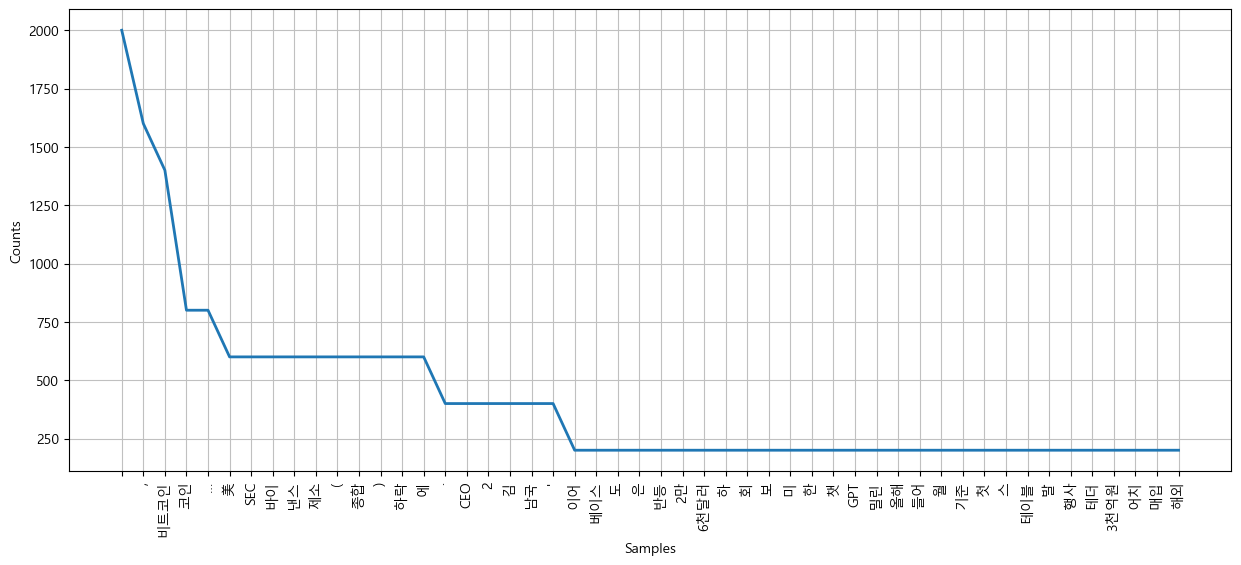

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
print(ko.vocab().most_common(200))
'''
stop_words = [
    [('비트코인', 2700), ('\n', 2499), (',', 2032), ("'", 1970), ('..', 1393), ('기대', 856), ('美', 813), ('[', 760), (']', 760), ('·', 736), ('은', 727), ('대형주', 689), ('부채', 665), ('협상', 595), ('"', 593), ('상승', 592), ('선', 562), ('주목', 541), ('FOMC', 534), ('증시', 529), ('와', 525), ('전자', 519), ('…', 511), ('코인', 490), ('한도', 473), ('시', 417), ('황', 406), ('횡보', 378), ('가격', 373), ('은행', 365), ('장', 362), ('주', 361), ('중', 350), ('삼성', 350), ('주춤', 349), ('필요', 349), ("',", 346), ('순환', 346), ('순', 345), ('환매', 343), ('다우', 343), ('골디락스', 342), ('2만', 299), ('하락', 264), ('?', 213), ('디폴트', 211), ('의', 210), ('7000달러', 208), ('뉴욕증시', 206), ('금리', 205), ('달러', 199), ('속보', 197), ('3600만원', 197), ('회복', 194), ('인상', 194), ('강세', 192), ('BTC', 192), ('적', 192), ('것', 190), ('우려', 189), ('27', 188), ('성', 188), ('타결', 187), ('오늘', 187), ('금', 186), ('앞두고', 186), ('k', 183), ('예상', 181), ('(', 181), (')', 181), ('vs', 181), ('발표', 180), ('에', 178), ('엔비디아', 178), ('뚝', 178), ('알트', 177), ('지표', 177), ('바이든', 177), ('등락', 177), ('큰', 176), ('보합', 176), ('폭발', 176), ('안정', 176), ('고용', 175), ('약', 175), ('국채', 175), ('포함', 174), ('주말', 173), ('곧', 173), ('추천', 173), ('기자회견', 173), ('의미', 173), ('반영', 172), ('대형', 172), ('구리', 172), ('현재상황', 171), ('활짝', 171), ('됐는데', 171), ('POSCO', 171), ('홀딩스', 171), ('더할', 171), ('삼', 171), ('한국', 171), ('...', 92), ('이', 87), ('브리핑', 67), ('피자', 60), ('대', 57), ('더', 56), ('화폐', 55), ('가상', 53), ('리움', 51), ('미국', 50), ('‘', 49), ('데이', 48), ('’', 46), ('전망', 37), ('반등', 36), ('로', 36), ('도', 36), ('”', 36), ('리플', 34), ('거래', 34), ('“', 34), ('자산', 33), ('합의', 33), ('상향', 33), ('미', 32), ('원대', 32), ('테더', 32), ('↑', 31), ('시세', 31), ('이벤트', 31), ('빗썸', 31), ('급락', 27), ('크립', 26), ('암호', 26), ('스', 26), ('..."', 25), ('세', 25), ('기념', 24), ('시장', 24), ('급등', 23), ('한', 23), ('약세', 23), ('바이', 22), ('낸스', 22), ('흔들', 21), ('에도', 21), ('돌파', 21), ('투자자', 21), ('규제', 21), ('지속', 21), ('경제', 21), ('위기', 21), ('토', 20), ('6000달러', 20), ('투자', 19), ('단기', 19), ('으로', 18), ('채굴', 18), ('분석', 17), ('↓', 17), ('인', 17), ('코빗', 17), ('매입', 17), ('연구소', 17), ('속', 17), ('NFT', 16), ('가', 16), ('가능성', 16), ('연', 16), ('테이블', 16), ('K', 16), ('7천달러', 15), ('CPI', 15), ('붕괴', 15), ('첫', 15), ('최저', 15), ('3600만', 15), ('준', 15), ('승인', 15), ('올해', 14), ('-', 14), ('권', 14), ('조정', 14), ('중단', 14), ('해야', 14), ('3500만원', 13), ('랠리', 13), ('두', 13), ('하는', 13), ("'…", 13), ('상승세', 13), ('"…', 13), ('3%', 13), ('발', 13), ('행사', 13), ('까지', 13), ('올', 12)]
]

tokens_ko = [each_word for each_word in tokens_ko
            if each_word not in stop_words]
'''
ko = nltk.Text(tokens_ko)

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

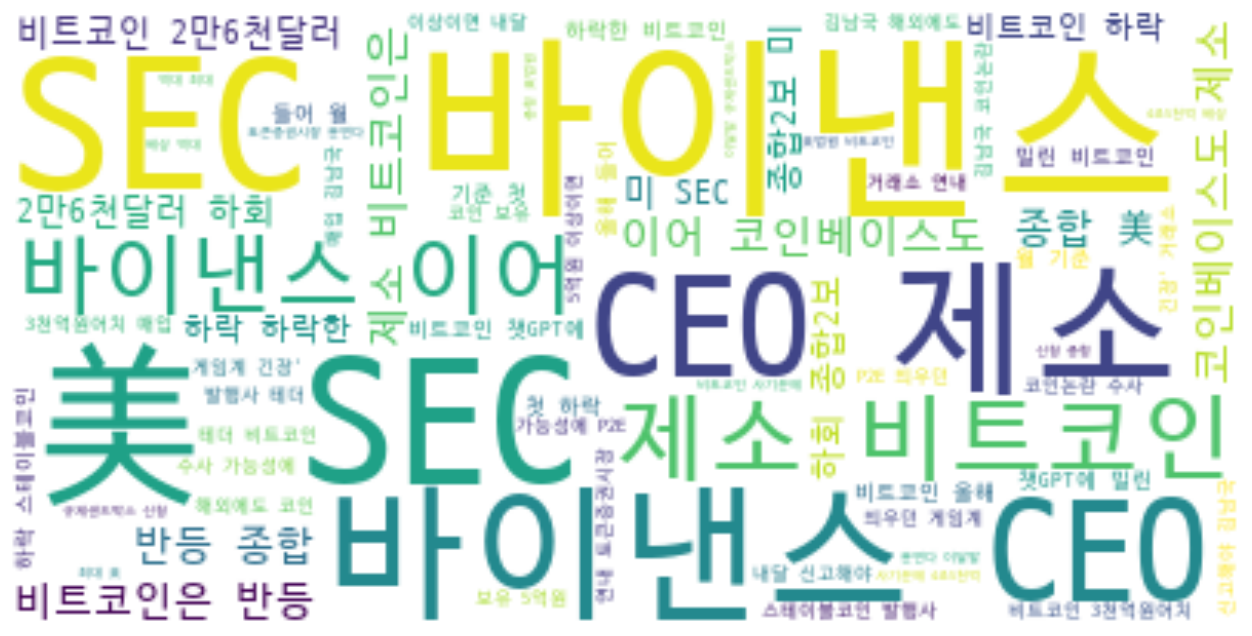

In [9]:
# Generate word cloud
wordcloud = WordCloud(font_path=r"C:/Users/SW/Desktop/D2Coding-Ver1.3.2-20180524-all.ttc",
                      relative_scaling=0.2,
                      background_color='white').generate(title_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
## 이걸로해야돼
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pyupbit
import os

df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=10)
df = df.dropna()
df.index = df.index.strftime('%Y-%m-%dT%H:%M:%S')
dates = df.index  # 인덱스에 dates 저장 날짜
df['Date'] = dates
df = df.set_index('Date')  # 'Date' 열을 인덱스로 설정합니다.

df['label'] = 0
for i in range(len(df) - 1):
    if df['close'][i] < df['close'][i+1]:
        df.loc[df.index[i], 'label'] = 1
    else:
        df.loc[df.index[i], 'label'] = 0

df.to_csv('upbit_data.csv')

print(df)

price_data = pd.read_csv('upbit_data.csv')

df_0 = price_data['Date'], price_data['close']
print(df_0)
print("----------------------------------------------------------------------")
df_1 = price_data['Date'], price_data['close']
print(df_1)

def get_news_content(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    content = soup.select_one('#articleBodyContents').get_text(separator=' ', strip=True)
    return content

def naver_bitcoin_news(dates, prices):
    error_cnt = 0
    base_url = 'https://search.naver.com/search.naver?where=news&query=비트코인&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={}&de={}&mynews=1&office_type=1&office_section_code=1&news_office_checked=1001&nso=so:r,p:from{}to{}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }

    result_list = []

    for date, price in zip(dates, prices):
        start_date = date
        end_date = date
        url = base_url.format(start_date, end_date, start_date, end_date)
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            soup = BeautifulSoup(res.text, 'html.parser')
            title_list = soup.select('ul.list_news li')
            for title in title_list:
                try:
                    news_title = title.select_one('a.news_tit').text.strip()
                    close_price = price  # 업비트에서 가져온 가격 사용
                    result_list.append([news_title, date, close_price, label])  # close_price 정보도 함께 추가
                except:
                    error_cnt += 1

    return result_list


result_list_0 = naver_bitcoin_news(df_0[0], df_0[1])
title_df_0 = pd.DataFrame(result_list_0, columns=['news_title', 'Date', 'close_price', 'label'])  # 'news_title'과 'Date' 열을 함께 생성
print(title_df_0)

result_list_1 = naver_bitcoin_news(df_1[0], df_1[1])
title_df_1 = pd.DataFrame(result_list_1, columns=['news_title', 'Date', 'close_price', 'label'])
print(title_df_1)

title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('naver_bit_data.csv', index=False, encoding='utf-8', mode='a', header=not os.path.exists('naver_bit_data.csv'))
print(title_df)


                           open        high         low       close   
Date                                                                  
2023-06-03T09:00:00  36089000.0  36102000.0  35801000.0  35888000.0  \
2023-06-04T09:00:00  35888000.0  36146000.0  35820000.0  35865000.0   
2023-06-05T09:00:00  35894000.0  35896000.0  33825000.0  34298000.0   
2023-06-06T09:00:00  34299000.0  35993000.0  33580000.0  35852000.0   
2023-06-07T09:00:00  35855000.0  35993000.0  34797000.0  34952000.0   
2023-06-08T09:00:00  34953000.0  35416000.0  34802000.0  34996000.0   
2023-06-09T09:00:00  34996000.0  35161000.0  34802000.0  34865000.0   
2023-06-10T09:00:00  34865000.0  34914000.0  33842000.0  34372000.0   
2023-06-11T09:00:00  34370000.0  34639000.0  34016000.0  34345000.0   
2023-06-12T09:00:00  34345000.0  34480000.0  34270000.0  34441000.0   

                          volume         value  label  
Date                                                   
2023-06-03T09:00:00  1925.565561  6

In [26]:
pip install kobert-transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 데이터 불러오기
data = pd.read_csv('naver_bit_data.csv')

# 뉴스 제목 추출
news_titles = data['news_title']

# Transformer 모델과 토크나이저 불러오기 (예시로는 KoBERT를 사용합니다)
tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")
model = AutoModelForSequenceClassification.from_pretrained("skt/kobert-base-v1")

# 뉴스 제목 임베딩
encoded_input = tokenizer.batch_encode_plus(
    news_titles.tolist(),
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors='pt'
)

# 모델에 입력값 전달하여 예측 수행
with torch.no_grad():
    model_output = model(**encoded_input)

# 예측 결과 확인
predictions = torch.softmax(model_output.logits, dim=1)
positive_prob = predictions[:, 1].tolist()

# 긍정과 부정을 분류한 결과를 데이터프레임에 추가
data['positive_prob'] = positive_prob

# 결과 출력
print(data[['news_title', 'positive_prob']])


ValueError: Couldn't instantiate the backend tokenizer from one of: 
(1) a `tokenizers` library serialization file, 
(2) a slow tokenizer instance to convert or 
(3) an equivalent slow tokenizer class to instantiate and convert. 
You need to have sentencepiece installed to convert a slow tokenizer to a fast one.

In [32]:

#감성분석기

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SW\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(news_title):
    sentiment = analyzer.polarity_scores(news_title)
    return sentiment['compound']

In [34]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('naver_bit_data.csv')

# 뉴스 제목과 감성 분석을 수행할 컬럼 선택
news_titles = df['news_title']

# 감성 분석을 위한 코드
for news_title in news_titles:
    sentiment_score = analyze_sentiment(news_title)
    if sentiment_score > 0:
        sentiment = "긍정적인 감성"
    elif sentiment_score < 0:
        sentiment = "부정적인 감성"
    else:
        sentiment = "중립적인 감성"

    print(f"뉴스 제목: {news_title}")
    print(f"감성 분석 결과: {sentiment} (감성 점수: {sentiment_score})")


뉴스 제목: SEC 바이낸스 이어 코인베이스도 제소비트코인은 반등종합
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: SEC 바이낸스CEO 제소비트코인 2만6천달러 하회종합2보
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 미 SEC 바이낸스CEO 제소 비트코인 하락
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 챗GPT에 밀린 비트코인올해 들어 월 기준 첫 하락
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 하락한 비트코인
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 스테이블코인 발행사 테더 비트코인 3천억원어치 매입
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 김남국 해외에도 코인 보유5억원 이상이면 내달 신고해야
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 김남국 코인논란 수사 가능성에 P2E 띄우던 게임계 긴장
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 권도형 체포 후 암호화폐 380억원어치 빼돌린 정황
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 가상화폐업계에 화난 SEC 위원장 이런 의무위반은 처음 본다
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: SEC 바이낸스 이어 코인베이스도 제소비트코인은 반등종합
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: SEC 바이낸스CEO 제소비트코인 2만6천달러 하회종합2보
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 미 SEC 바이낸스CEO 제소 비트코인 하락
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 챗GPT에 밀린 비트코인올해 들어 월 기준 첫 하락
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 하락한 비트코인
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 스테이블코인 발행사 테

In [34]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('naver_bit_data.csv')

# 뉴스 제목과 감성 분석을 수행할 컬럼 선택
news_titles = df['news_title']

# 감성 분석을 위한 코드
for news_title in news_titles:
    sentiment_score = analyze_sentiment(news_title)
    if sentiment_score > 0:
        sentiment = "긍정적인 감성"
    elif sentiment_score < 0:
        sentiment = "부정적인 감성"
    else:
        sentiment = "중립적인 감성"

    print(f"뉴스 제목: {news_title}")
    print(f"감성 분석 결과: {sentiment} (감성 점수: {sentiment_score})")


뉴스 제목: SEC 바이낸스 이어 코인베이스도 제소비트코인은 반등종합
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: SEC 바이낸스CEO 제소비트코인 2만6천달러 하회종합2보
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 미 SEC 바이낸스CEO 제소 비트코인 하락
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 챗GPT에 밀린 비트코인올해 들어 월 기준 첫 하락
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 하락한 비트코인
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 스테이블코인 발행사 테더 비트코인 3천억원어치 매입
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 김남국 해외에도 코인 보유5억원 이상이면 내달 신고해야
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 김남국 코인논란 수사 가능성에 P2E 띄우던 게임계 긴장
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 권도형 체포 후 암호화폐 380억원어치 빼돌린 정황
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 가상화폐업계에 화난 SEC 위원장 이런 의무위반은 처음 본다
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: SEC 바이낸스 이어 코인베이스도 제소비트코인은 반등종합
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: SEC 바이낸스CEO 제소비트코인 2만6천달러 하회종합2보
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 미 SEC 바이낸스CEO 제소 비트코인 하락
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 챗GPT에 밀린 비트코인올해 들어 월 기준 첫 하락
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 하락한 비트코인
감성 분석 결과: 중립적인 감성 (감성 점수: 0.0)
뉴스 제목: 스테이블코인 발행사 테

In [49]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=30)
df = df.dropna()
dates = df.index
df['Date'] = dates
df = df.set_index('Date')

df['label'] = 0
for i in range(len(df) - 1):
    if df['close'][i] < df['close'][i+1]:
        df.loc[df.index[i], 'label'] = 1
    else:
        df.loc[df.index[i], 'label'] = 0

df.to_csv('upbit_data.csv', index=True)
price_data = pd.read_csv('upbit_data.csv')

print(df)
print("------------------------------------------------")
print(price_data)

                           open        high         low       close   
Date                                                                  
2023-05-14 09:00:00  36382000.0  36800000.0  36193000.0  36415000.0  \
2023-05-15 09:00:00  36420000.0  37200000.0  36204000.0  36632000.0   
2023-05-16 09:00:00  36642000.0  36795000.0  36335000.0  36421000.0   
2023-05-17 09:00:00  36419000.0  36835000.0  35938000.0  36700000.0   
2023-05-18 09:00:00  36706000.0  36920000.0  35800000.0  36240000.0   
2023-05-19 09:00:00  36240000.0  36486000.0  35950000.0  36156000.0   
2023-05-20 09:00:00  36156000.0  36475000.0  36119000.0  36385000.0   
2023-05-21 09:00:00  36404000.0  36618000.0  36048000.0  36051000.0   
2023-05-22 09:00:00  36057000.0  36200000.0  35709000.0  35947000.0   
2023-05-23 09:00:00  35947000.0  36660000.0  35841000.0  36381000.0   
2023-05-24 09:00:00  36382000.0  36430000.0  35144000.0  35452000.0   
2023-05-25 09:00:00  35465000.0  35670000.0  35000000.0  35547000.0   
2023-0

In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pyupbit

# Upbit 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=30)
df = df.dropna()

# 데이터에 날짜 컬럼 추가
df['Date'] = df.index

#전날 비교 상승하락 지정
df['label'] = 0
for i in range(len(df) - 1):
    if df['close'][i] < df['close'][i+1]:
        df.loc[df.index[i], 'label'] = 1
    else:
        df.loc[df.index[i], 'label'] = 0

# 데이터를 CSV 파일로 저장
df.to_csv('upbit_data.csv')

# 뉴스 크롤링 함수
def naver_bitcoin_news(dates, prices, labels):  # labels 추가
    result_list = []

    for date, price, label in zip(dates, prices, labels):  # labels 추가
        url = f"https://search.naver.com/search.naver?where=news&query=비트코인&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={date}&de={date}&mynews=1&office_type=1&office_section_code=1&news_office_checked=1001&nso=so:r,p:from{date}to{date}"
        res = requests.get(url)
        if res.status_code == 200:
            soup = BeautifulSoup(res.text, 'html.parser')
            title_list = soup.select('ul.list_news li')
            for title in title_list:
                try:
                    news_title = title.select_one('a.news_tit').text.strip()
                    close_price = price
                    result_list.append([news_title, date, close_price, label])  # label 추가
                except:
                    pass

    return result_list

# Upbit 데이터 읽어오기
price_data = pd.read_csv('upbit_data.csv')

# 날짜와 가격 데이터, 레이블을 사용하여 뉴스 크롤링
result_list = naver_bitcoin_news(price_data['Date'], price_data['close'], price_data['label'])  # 레이블 추가
title_df = pd.DataFrame(result_list, columns=['news_title', 'Date', 'close_price', 'label'])

# 뉴스 데이터를 CSV 파일로 저장
title_df.to_csv('naver_bit_data.csv', index=False, encoding='utf-8')

print(title_df)


                                   news_title                 Date   
0       美 법무부, 2011년 비트코인 64만개 해킹한 러시아인 2명 기소  2023-05-14 09:00:00  \
1       美 SEC, 바이낸스 이어 코인베이스도 제소…비트코인은 반등(종합)  2023-05-14 09:00:00   
2    美 SEC, 바이낸스·CEO 제소…비트코인, 2만6천달러 하회(종합2보)  2023-05-14 09:00:00   
3                 미 SEC, 바이낸스·CEO 제소, 비트코인 하락  2023-05-14 09:00:00   
4                                    하락한 비트코인  2023-05-14 09:00:00   
..                                        ...                  ...   
295             챗GPT에 밀린 비트코인…올해 들어 월 기준 첫 하락  2023-06-12 09:00:00   
296             스테이블코인 발행사 테더, 비트코인 3천억원어치 매입  2023-06-12 09:00:00   
297          김남국 해외에도 코인 보유?…5억원 이상이면 내달 신고해야  2023-06-12 09:00:00   
298         김남국 코인논란 수사 가능성에 P2E 띄우던 게임계 '긴장'  2023-06-12 09:00:00   
299           美법원, 비트코인 사기꾼에 "4조5천억 배상"…역대 최대  2023-06-12 09:00:00   

     close_price  label  
0     36415000.0      1  
1     36415000.0      1  
2     36415000.0      1  
3     36415000.0      1  
4     36415000.0      1  
.. 

In [63]:
pip install TextBlob

     ------------------------------------- 636.8/636.8 kB 13.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
#긍정 부정 중립 나눈 코드 이제 이걸로사용 !!

import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
import pyupbit

# Upbit 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=30)
df = df.dropna()

# 데이터에 날짜 컬럼 추가
df['Date'] = df.index

# 데이터를 CSV 파일로 저장
df.to_csv('upbit_data.csv')

# 뉴스 크롤링 함수
def naver_bitcoin_news(dates, prices):
    result_list = []

    for date, price in zip(dates, prices):
        url = f"https://search.naver.com/search.naver?where=news&query=비트코인&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={date}&de={date}&mynews=1&office_type=1&office_section_code=1&news_office_checked=1001&nso=so:r,p:from{date}to{date}"
        res = requests.get(url)
        if res.status_code == 200:
            soup = BeautifulSoup(res.text, 'html.parser')
            title_list = soup.select('ul.list_news li')
            for title in title_list:
                try:
                    news_title = title.select_one('a.news_tit').text.strip()
                    close_price = price
                    model.add(LSTM())
                    # 1 긍정 -1 부정 0 중립
                    sentiment = TextBlob(news_title).sentiment.polarity  # 감성 분석 수행
                    if sentiment > 0:
                        result_list.append([news_title, date, close_price, 1])
                    elif sentiment < 0:
                        result_list.append([news_title, date, close_price, -1])
                    else:
                        result_list.append([news_title, date, close_price, 0])
                except:
                    pass

    return result_list

# Upbit 데이터 읽어오기
price_data = pd.read_csv('upbit_data.csv')

# 날짜와 가격 데이터를 사용하여 뉴스 크롤링
result_list = naver_bitcoin_news(price_data['Date'], price_data['close'])
title_df = pd.DataFrame(result_list, columns=['news_title', 'Date', 'close_price', 'label'])

# 뉴스 데이터를 CSV 파일로 저장
title_df.to_csv('naver_bit_data.csv', index=False, encoding='utf-8')

print(title_df)


                                   news_title                 Date   
0       美 법무부, 2011년 비트코인 64만개 해킹한 러시아인 2명 기소  2023-05-14 09:00:00  \
1       美 SEC, 바이낸스 이어 코인베이스도 제소…비트코인은 반등(종합)  2023-05-14 09:00:00   
2    美 SEC, 바이낸스·CEO 제소…비트코인, 2만6천달러 하회(종합2보)  2023-05-14 09:00:00   
3                 미 SEC, 바이낸스·CEO 제소, 비트코인 하락  2023-05-14 09:00:00   
4                                    하락한 비트코인  2023-05-14 09:00:00   
..                                        ...                  ...   
295             챗GPT에 밀린 비트코인…올해 들어 월 기준 첫 하락  2023-06-12 09:00:00   
296             스테이블코인 발행사 테더, 비트코인 3천억원어치 매입  2023-06-12 09:00:00   
297          김남국 해외에도 코인 보유?…5억원 이상이면 내달 신고해야  2023-06-12 09:00:00   
298         김남국 코인논란 수사 가능성에 P2E 띄우던 게임계 '긴장'  2023-06-12 09:00:00   
299           美법원, 비트코인 사기꾼에 "4조5천억 배상"…역대 최대  2023-06-12 09:00:00   

     close_price  label  
0     36415000.0      0  
1     36415000.0     -1  
2     36415000.0     -1  
3     36415000.0     -1  
4     36415000.0      0  
.. 

In [79]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 뉴스 데이터 읽기
title_df = pd.read_csv('naver_bit_data.csv')

# 입력 데이터 준비
tokenizer = Tokenizer()
tokenizer.fit_on_texts(title_df['news_title'])
sequences = tokenizer.texts_to_sequences(title_df['news_title'])
vocab_size = len(tokenizer.word_index) + 1
max_len = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_len)

# 출력 데이터 준비
y = title_df['close_price'].values

# 날짜 데이터 준비
dates = pd.to_datetime(title_df['Date']).values

# 데이터를 훈련 및 테스트 세트로 분할
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# LSTM 모델 생성
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='linear'))

# 모델 컴파일 및 훈련
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# 예측 수행
y_pred = model.predict(X_test)

# 오른다/내린다 확률 계산
probabilities = []
for pred in y_pred:
    if np.any(pred > y_test):
        probabilities.append(1)
    else:
        probabilities.append(0)

# 뉴스 제목과 확률 출력
for title, prob, date in zip(title_df['news_title'][split:], probabilities, dates_test):
    sentiment = "오른다" if prob == 1 else "내린다"
    print(f"뉴스 제목: {title}")
    print(f"예측 확률: {prob}")
    print(f"날짜: {date}")
    print(f"종가가 {sentiment} 가능성이 있습니다.\n")


Epoch 1/100
8/8 [==============================] - 2s 97ms/step - loss: 1306526635524096.0000 - val_loss: 1198433448755200.0000
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 1306526635524096.0000 - val_loss: 1198433448755200.0000
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 1306526635524096.0000 - val_loss: 1198433448755200.0000
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 1306526367088640.0000 - val_loss: 1198432911884288.0000
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 1306526098653184.0000 - val_loss: 1198432777666560.0000
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 1306525696000000.0000 - val_loss: 1198432777666560.0000
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 1306525696000000.0000 - val_loss: 1198432777666560.0000
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 1306525964435456.0000 - val_loss: 11984

2/2 [==============================] - 0s 3ms/step


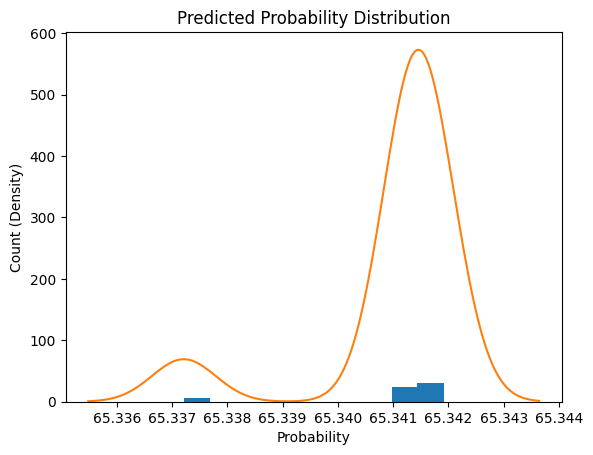

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 예측 확률값 얻기
y_prob = model.predict(X_test)
y_prob_positive = y_prob[:, 0]  # 양성 클래스(1)에 대한 예측 확률값

# 히스토그램 시각화
plt.hist(y_prob_positive, bins=10)
sns.kdeplot(y_prob_positive)  # KDE 플롯 시각화
plt.title('Predicted Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count (Density)')
plt.show()


2/2 [==============================] - 0s 3ms/step
뉴스 제목: 美 법무부, 2011년 비트코인 64만개 해킹한 러시아인 2명 기소
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 美 SEC, 바이낸스 이어 코인베이스도 제소…비트코인은 반등(종합)
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 美 SEC, 바이낸스·CEO 제소…비트코인, 2만6천달러 하회(종합2보)
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 미 SEC, 바이낸스·CEO 제소, 비트코인 하락
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 하락한 비트코인
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 챗GPT에 밀린 비트코인…올해 들어 월 기준 첫 하락
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 스테이블코인 발행사 테더, 비트코인 3천억원어치 매입
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 김남국 해외에도 코인 보유?…5억원 이상이면 내달 신고해야
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 김남국 코인논란 수사 가능성에 P2E 띄우던 게임계 '긴장'
예측 확률: 0
날짜: 2023-06-07T09:00:00.000000000
종가가 내린다 가능성이 있습니다.

뉴스 제목: 美법원, 비트코인 사기꾼에 "4조5천억 배상"…역대 최대

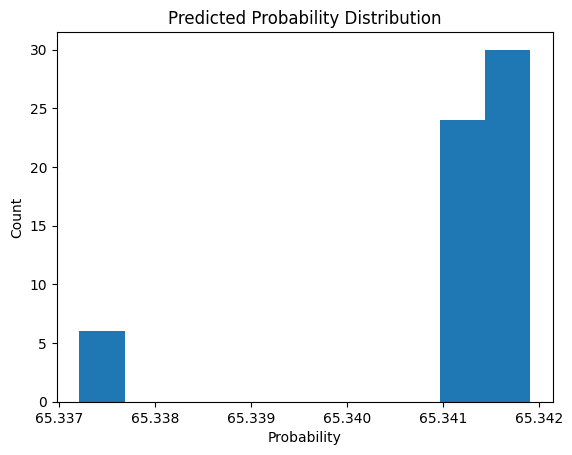

In [88]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 오른다/내린다 확률 계산
probabilities = []
for pred in y_pred:
    if np.any(pred > y_test):
        probabilities.append(1)
    else:
        probabilities.append(0)

# 뉴스 제목과 확률 출력
for title, prob, date in zip(title_df['news_title'][split:], probabilities, dates_test):
    sentiment = "오른다" if prob == 1 else "내린다"
    print(f"뉴스 제목: {title}")
    print(f"예측 확률: {prob}")
    print(f"날짜: {date}")
    print(f"종가가 {sentiment} 가능성이 있습니다.\n")

# 모델 예측 확률값 얻기
y_prob = model.predict(X_test)
y_prob_positive = y_prob[:, 0]  # 양성 클래스(1)에 대한 예측 확률값

# 히스토그램 시각화
plt.hist(y_prob_positive, bins=10)
plt.title('Predicted Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()


In [89]:
import pandas as pd
from konlpy.tag import Twitter
import nltk

bit_news = pd.read_csv('naver_bit_data.csv')
title_list = bit_news['news_title'].tolist()
title_text = ''
for each_line in title_list:
    title_text = title_text + each_line + '\n'
title_text

t = Twitter() #형태소
tokens_ko = t.morphs(title_text)
ko = nltk.Text(tokens_ko)
print(len(ko.tokens)) # 토큰 전체 개수
print(len(set(ko.tokens))) # 토큰 unique 개수

C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


4170
85


In [90]:
import pandas as pd
import urllib.request
%matplotlib inline
import re
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

#데이터 불러오기
train_data = pd.read_csv('naver_bit_data.csv')
test_data = pd.read_csv('naver_bit_data.csv')

print(train_data.head())
print(test_data.head())

                                 news_title                 Date  close_price   
0     美 법무부, 2011년 비트코인 64만개 해킹한 러시아인 2명 기소  2023-05-14 09:00:00   36415000.0  \
1     美 SEC, 바이낸스 이어 코인베이스도 제소…비트코인은 반등(종합)  2023-05-14 09:00:00   36415000.0   
2  美 SEC, 바이낸스·CEO 제소…비트코인, 2만6천달러 하회(종합2보)  2023-05-14 09:00:00   36415000.0   
3               미 SEC, 바이낸스·CEO 제소, 비트코인 하락  2023-05-14 09:00:00   36415000.0   
4                                  하락한 비트코인  2023-05-14 09:00:00   36415000.0   

   label  
0      0  
1     -1  
2     -1  
3     -1  
4      0  
                                 news_title                 Date  close_price   
0     美 법무부, 2011년 비트코인 64만개 해킹한 러시아인 2명 기소  2023-05-14 09:00:00   36415000.0  \
1     美 SEC, 바이낸스 이어 코인베이스도 제소…비트코인은 반등(종합)  2023-05-14 09:00:00   36415000.0   
2  美 SEC, 바이낸스·CEO 제소…비트코인, 2만6천달러 하회(종합2보)  2023-05-14 09:00:00   36415000.0   
3               미 SEC, 바이낸스·CEO 제소, 비트코인 하락  2023-05-14 09:00:00   36415000.0   
4                                  하락한 비트코

In [91]:
import konlpy
from konlpy.tag import Okt
import numpy as np
from collections import Counter
import re

tokenizer = Okt()
stopwords = [
    '의', '가', '이', '은', '들',
    '는', '좀', '잘', '걍', '과',
    '도', '를', '와', '자', '에',
    '한', '으로', '하다'
]

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['news_title'], inplace=True)
    train_data['news_title'] = train_data['news_title'].str.replace(r"[^가-힣ㅏ-ㅣ]", " ", regex=True)
    train_data['news_title'].replace('', np.nan, regex=True, inplace=True)
    train_data.dropna(how='any', inplace=True)

    test_data.drop_duplicates(subset=['news_title'], inplace=True)
    test_data['news_title'] = test_data['news_title'].str.replace(r"[^가-힣ㅏ-ㅣ]", " ", regex=True)
    test_data['news_title'].replace('', np.nan, regex=True, inplace=True)
    test_data.dropna(how='any', inplace=True)

    X_train = []
    for sentence in train_data['news_title']:
        temp_X = tokenizer.morphs(sentence) #토큰화
        temp_X = [word for word in temp_X if not word in stopwords] #불용어제거
        X_train.append(temp_X)
        
    X_test = []
    for sentence in test_data['news_title']:
        temp_X = tokenizer.morphs(sentence) #토큰화
        temp_X = [word for word in temp_X if not word in stopwords] #불용어제거
        X_test.append(temp_X)
        
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {
        word:index for index, word in enumerate(vocab)
    }
    
    #{단어 : 숫자} 딕셔너리
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index
                else word_to_index['<UNK>'] for word in wordlist]
    
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
    
    y_train = np.array(train_data['label'])
    y_test = np.array(test_data['label'])
    
    return X_train, y_train, X_test, y_test, word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)


In [92]:
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)
print(f'train data number: {len(X_train)}, test data number: {len(X_test)}')
print(f'train data number: {len(y_train)}, test data number: {len(y_test)}')

train data number: 10, test data number: 10
train data number: 10, test data number: 10


In [61]:
#딕셔너리 변수를 index_to_word로 바꿔준다
index_to_word = {index:word for word, index in word_to_index.items()}

In [95]:
#1번 모든 문장은 로 시작
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

#여러 개의 문장 리스트를 한번에 단어 인덱스 리스트 벡터로 encode해주는 함수
def get_encoded_sentences(sentence, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences] 
    
#숫자 벡터로 encode된 문장을 원래대로 decode해주는 함수   
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:]) # [1:]를 통해 <BOS>를 제와

#여러 개의 숫자 벡터로 encode된 문장을 한번에 원래대로 decode해주는 함수
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [102]:
# 모델 구성을 위한 데이터 분석 및 가공
#데이터셋 내 문장 길이 분포
#적절한 최대 문장 길이 지정
#keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

In [103]:
total_data_text = list(X_train) + list(X_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후 
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장길이의 평균값, 최대값, 표준편차를 계산
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차) 로 한다면,
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)

print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  8.6
문장길이 최대 :  12
문장길이 표준편차 :  2.6907248094147422
pad_sequences maxlen :  13
전체 문장의 1.0%가 maxlen 설정값 이내에 포함됩니다. 


In [105]:
#▶-keras.preprocessing.sequence.pad_sequences-을-활용한-패딩-추가
# padding 방식을 문장 뒤쪽('post')과 앞쪽('pre')중 선택에 따라 RNN을 이용한 딥러닝 적용 시 성능차이가 있다.

import tensorflow as tf

X_train_post = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                            value=word_to_index["<PAD>"],
                                                            padding='post',
                                                            maxlen=maxlen)

X_test_post = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                            value=word_to_index["<PAD>"],
                                                            padding='post',
                                                            maxlen=maxlen)

print(f'X_train_post: {X_train_post.shape}')
print(f'X_test_post: {X_test_post.shape}')

X_train_pre = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                            value=word_to_index["<PAD>"],
                                                            padding='post',
                                                            maxlen=maxlen)

X_test_pre = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                            value=word_to_index["<PAD>"],
                                                            padding='post',
                                                            maxlen=maxlen)

print(f'X_train_pre: {X_train_pre.shape}')
print(f'X_test_pre: {X_test_pre.shape}')


X_train_post: (10, 13)
X_test_post: (10, 13)
X_train_pre: (10, 13)
X_test_pre: (10, 13)


In [109]:
print('<X_train_post>\n')

for i in range(4):
    label = y_train[i]
    encode = X_train_post[i]
    decode = get_decoded_sentence(X_train[i], index_to_word)
    print(f'label: {label}\n\
    encode: {encode}\n\
    decode: {decode}')

<X_train_post>

label: 0
    encode: [14 15  4 10 16 17 18 19 20  0  0  0  0]
    decode: 년 비트코인 만 개 해킹 러시아인 명 기소
label: -1
    encode: [ 6  7 21  5 22  8  4 23 11  0  0  0  0]
    decode: 낸스 이어 코인 베이스 제소 비트코인 반등 종합
label: -1
    encode: [ 6  7  8  4 10 24 25 26 27 11 28  0  0]
    decode: 낸스 제소 비트코인 만 천 달러 하 회 종합 보
label: -1
    encode: [29  6  7  8  4  9  0  0  0  0  0  0  0]
    decode: 바이 낸스 제소 비트코인 하락


In [110]:
print('<X_train_pre>\n')

for i in range(4):
    label = y_train[i]
    encode = X_train_pre[i]
    decode = get_decoded_sentence(X_train[i], index_to_word)
    print(f'label: {label}\n\
    encode: {encode}\n\
    decode: {decode}')

<X_train_pre>

label: 0
    encode: [14 15  4 10 16 17 18 19 20  0  0  0  0]
    decode: 년 비트코인 만 개 해킹 러시아인 명 기소
label: -1
    encode: [ 6  7 21  5 22  8  4 23 11  0  0  0  0]
    decode: 낸스 이어 코인 베이스 제소 비트코인 반등 종합
label: -1
    encode: [ 6  7  8  4 10 24 25 26 27 11 28  0  0]
    decode: 낸스 제소 비트코인 만 천 달러 하 회 종합 보
label: -1
    encode: [29  6  7  8  4  9  0  0  0  0  0  0  0]
    decode: 바이 낸스 제소 비트코인 하락


In [ ]:
# 모델구성 및 vaildation set 구성
'''
Vaildation set
적절한 학습을 위해 train set 과 val set을 구분한다
1/3 으로 train srt()
'''

In [111]:
X_val_post = X_train_post[:3]
X_val_pre = X_train_pre[:3]
y_val = y_train[:3]

partial_X_train_post = X_train_post[3:]
partial_X_train_pre = X_train_pre[3:]
partial_y_train = y_train[3:]

print(f'X_val_post: {X_val_post.shape}')
print(f'X_val_pre: {X_val_pre.shape}')
print(f'y_val: {y_val.shape}')
print()
print(f'partial_X_train_post: {partial_X_train_post.shape}')
print(f'partial_X_train_pre: {partial_X_train_pre.shape}')
print(f'partial_y_train: {partial_y_train.shape}')


X_val_post: (3, 13)
X_val_pre: (3, 13)
y_val: (3,)

partial_X_train_post: (7, 13)
partial_X_train_pre: (7, 13)
partial_y_train: (7,)


In [113]:
# Recurrent Neural Network(RNN)
# post_modelR(RNN)

vocab_size = 10000
word_vector_dim = 16

# LSTM 레이어로 모델 설계
post_modelR = keras.Sequential()
post_modelR.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
post_modelR.add(keras.layers.LSTM(8)) #LSTM stats 벡터의 차원수(변경가능)
post_modelR.add(keras.layers.Dense(8, activation='relu'))
post_modelR.add(keras.layers.Dense(1, activation='sigmoid'))

post_modelR.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          160000    
                                                                 
 lstm_7 (LSTM)               (None, 8)                 800       
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [118]:
# Recurrent Neural Networ(RNN)
# post_modelR(RNN)

vocab_size = 10000
word_vector_dim = 16

# LSTM 레이어로 모델 설계
pre_modelR = keras.Sequential()
pre_modelR.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
pre_modelR.add(keras.layers.LSTM(8)) #LSTM stats 벡터의 차원수(변경가능)
pre_modelR.add(keras.layers.Dense(8, activation='relu'))
pre_modelR.add(keras.layers.Dense(1, activation='sigmoid')) # 최종출력은 긍정/부정을 나타내느 1dim

pre_modelR.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 16)          160000    
                                                                 
 lstm_10 (LSTM)              (None, 8)                 800       
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [120]:
#모델 훈련 개시
post_modelR.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

post_modelR_history = post_modelR.fit(partial_X_train_post,
                                     partial_y_train,
                                     epochs=5,
                                     batch_size=512,
                                     validation_data=(X_val_post, y_val),
                                     verbose=1)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.6899 - accuracy: 0.8571 - val_loss: 0.6776 - val_accuracy: 0.3333
Epoch 2/5
1/1 [==============================] - 0s 30ms/step - loss: 0.6848 - accuracy: 0.8571 - val_loss: 0.6701 - val_accuracy: 0.3333
Epoch 3/5
1/1 [==============================] - 0s 29ms/step - loss: 0.6800 - accuracy: 0.8571 - val_loss: 0.6626 - val_accuracy: 0.3333
Epoch 4/5
1/1 [==============================] - 0s 29ms/step - loss: 0.6752 - accuracy: 0.8571 - val_loss: 0.6550 - val_accuracy: 0.3333
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 0.6703 - accuracy: 0.8571 - val_loss: 0.6473 - val_accuracy: 0.3333


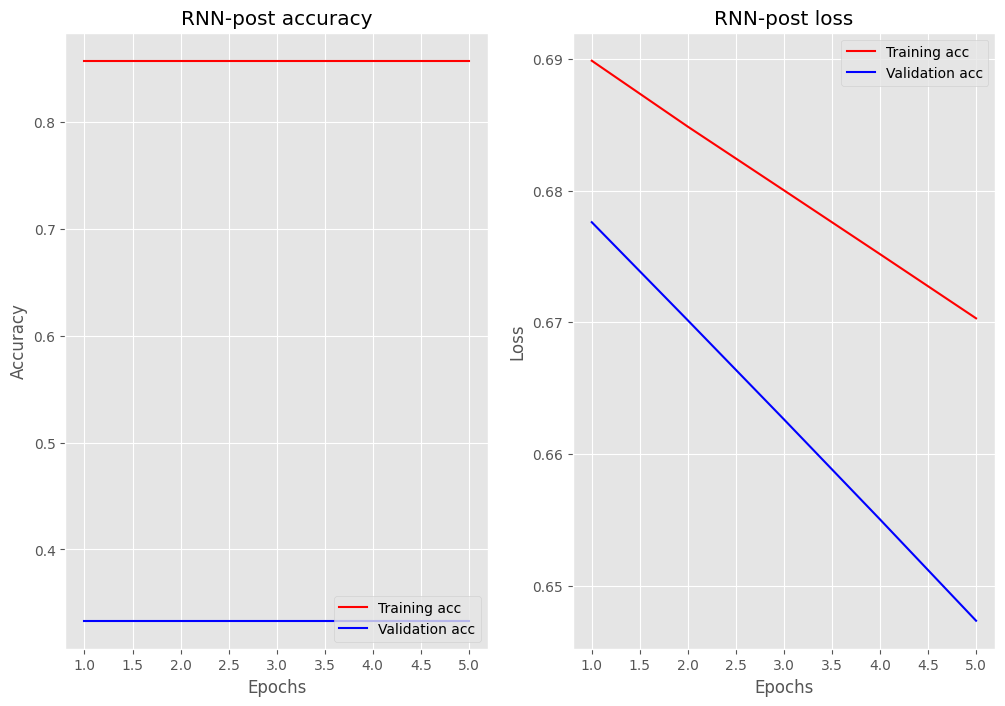

1/1 - 0s - loss: 0.6600 - accuracy: 0.7000 - 17ms/epoch - 17ms/step
[0.6599600911140442, 0.699999988079071]


In [123]:
import matplotlib.pyplot as plt
post_modelR_dict = post_modelR_history.history

accuracy = post_modelR_dict['accuracy']
val_accuracy = post_modelR_dict['val_accuracy']
loss = post_modelR_dict['loss']
val_loss = post_modelR_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12,8))

#accuracy 그래프
plt.style.use('ggplot')
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('RNN-post accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#loss 그래프
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('RNN-post loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

results = post_modelR.evaluate(X_test_pre, y_test, verbose=2)
print(results)

In [ ]:
import os 

# 학습한 Embedding 

In [93]:
print(X_train)

[[14, 15, 4, 10, 16, 17, 18, 19, 20], [6, 7, 21, 5, 22, 8, 4, 23, 11], [6, 7, 8, 4, 10, 24, 25, 26, 27, 11, 28], [29, 6, 7, 8, 4, 9], [9, 4], [30, 31, 4, 32, 33, 34, 35, 36, 9], [37, 38, 5, 39, 40, 41, 4, 42, 43, 44], [12, 13, 45, 46, 5, 47, 48, 49, 50, 51, 52, 53], [12, 13, 5, 54, 55, 56, 57, 58, 59, 60], [61, 4, 62, 63, 64, 65, 66, 67]]


In [ ]:
#여기까지

In [47]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# 불용어
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', 'br', '/><', '/>', '.<']

from konlpy.tag import Okt
from konlpy.utils import pprint

okt = Okt()

all_nouns = []
all_nouns2 = []
for row in train_data:
    temp_X = okt.morphs(row[3], stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    all_nouns.append(temp_X)

for row in test_data:
    temp_X = okt.morphs(row[3], stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    all_nouns2.append(temp_X)


본문의 최대 길이 :  1
본문의 평균 길이 :  1.0


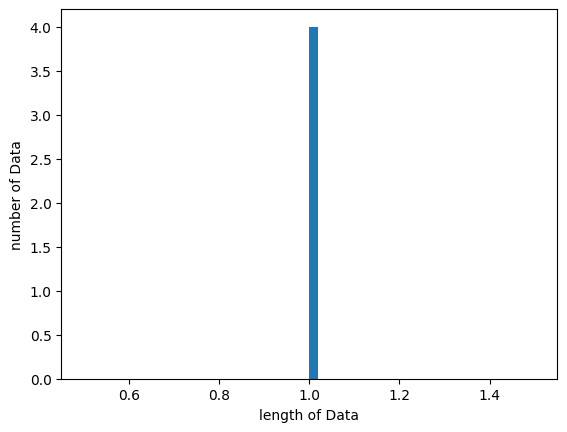

In [25]:
# 데이터 토큰화
from keras.preprocessing.text import Tokenizer
import json

max_words = 10000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(all_nouns)

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H-%M-%S")
outputfilename = 'all_nouns' + current_time + '.json'

with open(outputfilename, 'w') as outfile:
    json.dump(all_nouns, outfile)

X_train = tokenizer.texts_to_sequences(all_nouns)
X_test = tokenizer.texts_to_sequences(all_nouns2)

print("본문의 최대 길이 : ", max(len(l) for l in X_train))
print("본문의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))

# 결과를 차트로 출력
import matplotlib.pyplot as plt
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

# 학습 데이터, 테스트 데이터 분리
import numpy as np
y_train = []
y_test = []

type_of_result = 18
y_result = []
for i in range(type_of_result):
    temp = []
    for j in range(type_of_result):
        if j == i:
            temp.append(1)
        else:
            temp.append(0)
    y_result.append(temp.copy())

for i in range(len(train_data)):
    for type in range(type_of_result):
        if train_data[i][4] == type:
            y_train.append(y_result[type].copy())

for i in range(len(test_data)):
    for type in range(type_of_result):
        if test_data[i][4] == type:
            y_test.append(y_result[type].copy())

y_train = np.array(y_train)
y_test = np.array(y_test)

In [223]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pyupbit

# Upbit 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=2000)
df = df.dropna()

# 데이터에 날짜 컬럼 추가
df['Date'] = df.index

# 데이터를 CSV 파일로 저장
df.to_csv('upbit_data.csv')

# 뉴스 크롤링 함수
def naver_bitcoin_news(dates, prices):
    result_list = []

    for date, price in zip(dates, prices):
        url = f"https://search.naver.com/search.naver?where=news&query=비트코인&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={date}&de={date}&mynews=1&office_type=1&office_section_code=1&news_office_checked=1001&nso=so:r,p:from{date}to{date}"
        res = requests.get(url)
        if res.status_code == 200:
            soup = BeautifulSoup(res.text, 'html.parser')
            title_list = soup.select('ul.list_news li')
            for title in title_list:
                try:
                    news_title = title.select_one('a.news_tit').text.strip()
                    close_price = price
                    result_list.append([date, news_title, close_price])
                except:
                    pass

    return result_list

# Upbit 데이터 읽어오기
price_data = pd.read_csv('upbit_data.csv')

# 날짜와 가격 데이터, 레이블을 사용하여 뉴스 크롤링
result_list = naver_bitcoin_news(price_data['Date'], price_data['close'])
title_df = pd.DataFrame(result_list, columns=['Date', 'news_title', 'close_price'])

# 뉴스 데이터를 CSV 파일로 저장
title_df.to_csv('naver_bit_data.csv', index=False, encoding='utf-8')

print(title_df)
#파인 튜닝 해보기

                      Date                                news_title   
0      2017-12-28 09:00:00                                  하락한 비트코인  \
1      2017-12-28 09:00:00      비트코인, '美 FOMC 여파' 한때 석달 만에 2만5천달러 하회   
2      2017-12-28 09:00:00     美 법무부, 2011년 비트코인 64만개 해킹한 러시아인 2명 기소   
3      2017-12-28 09:00:00    "매달 10~14% 수익 주겠다"…억대 비트코인 투자사기 50대 집유   
4      2017-12-28 09:00:00      비트코인, '미 FOMC 여파' 한때 석달 만에 2만5천달러 하회   
...                    ...                                       ...   
19995  2023-06-19 09:00:00         금융당국 등록사업자까지…코인예치서비스 잇단 출금 중단(종합)   
19996  2023-06-19 09:00:00  美 SEC, 바이낸스·CEO 제소…비트코인, 2만6천달러 하회(종합2보)   
19997  2023-06-19 09:00:00     美 SEC, 바이낸스 이어 코인베이스도 제소…비트코인은 반등(종합)   
19998  2023-06-19 09:00:00               미 SEC, 바이낸스·CEO 제소, 비트코인 하락   
19999  2023-06-19 09:00:00             챗GPT에 밀린 비트코인…올해 들어 월 기준 첫 하락   

       close_price  
0       19565000.0  
1       19565000.0  
2       19565000.0  
3       19565000.0  
4       19565000.0  
...      

In [125]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('naver_bit_data.csv')


# 데이터의 'news_title' 열 추출
news_data = data['news_title'].tolist()

# 텍스트 전처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_data)
sequences = tokenizer.texts_to_sequences(news_data)
word_index = tokenizer.word_index

# 패딩
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Word2Vec 모델 훈련
embedding_dim = 100
word2vec_model = Word2Vec(sentences=[text.split() for text in news_data], vector_size=embedding_dim, window=5, min_count=1, workers=4)

# 단어 임베딩 행렬 생성
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

print(max_sequence_length)
print(padded_sequences)

10
[[ 0  0  0 ...  0 14  1]
 [ 0  1 15 ...  9 10  2]
 [ 0  3 16 ... 20 21 22]
 ...
 [ 0  0  3 ... 44 45 11]
 [ 0  0  0 ... 47  1 13]
 [ 0  0 48 ... 53 54 13]]


In [225]:
import numpy as np
import pandas as pd
import tensorflow as tf
from gensim.models import Word2Vec
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt

# 데이터 불러오기
data = pd.read_csv("naver_bit_data.csv")
text_data = data["news_title"].tolist()

# 텍스트 전처리
text_data = [text.translate(str.maketrans('', '', '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~''')) for text in text_data]
text_data = [re.sub(r'\d+', '', text) for text in text_data]
text_data = [text.strip() for text in text_data]

# 불용어 처리
okt = Okt()
stopwords = ["은", "는", "이", "가", "을", "를", "으로", "로", "에", "에서"]
text_data = [' '.join([word for word in okt.morphs(text) if word not in stopwords]) for text in text_data]

# 토큰화 정리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
word_index = tokenizer.word_index

# 시퀀스 패딩
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 워드 임베딩 행렬 생성
embedding_dim = 300
word2vec_model = Word2Vec(sentences=[text.split() for text in text_data], vector_size=embedding_dim, window=5, min_count=1, workers=4)
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# 레이블 준비
sentiment_labels = ["0", "1", "2"]
sentiments = np.random.choice(sentiment_labels, size=len(text_data))
data["sentiment"] = sentiments

# 훈련 및 테스트 데이터 분할
X = padded_sequences
y = np.asarray([sentiment_labels.index(sentiment) for sentiment in sentiments])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 딥러닝 모델 생성 및 구성
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))  # 추가 LSTM 레이어
model.add(LSTM(32))  # 추가 LSTM 레이어
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))  # 추가 Dense 레이어
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
learning_rate = 0.001  # 학습률 조정
batch_size = 32  # 배치 크기 조정
epochs = 10  # 에포크 수 조정
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Epoch 1/10
400/400 [==============================] - 11s 20ms/step - loss: 0.0379 - accuracy: 0.3281 - val_loss: 0.0071 - val_accuracy: 0.3284
Epoch 2/10
400/400 [==============================] - 7s 18ms/step - loss: 0.0064 - accuracy: 0.3282 - val_loss: -0.0181 - val_accuracy: 0.3284
Epoch 3/10
400/400 [==============================] - 7s 18ms/step - loss: -0.0325 - accuracy: 0.3282 - val_loss: -0.0590 - val_accuracy: 0.3284
Epoch 4/10
400/400 [==============================] - 7s 18ms/step - loss: -0.0707 - accuracy: 0.3282 - val_loss: -0.1085 - val_accuracy: 0.3284
Epoch 5/10
400/400 [==============================] - 7s 18ms/step - loss: -0.1944 - accuracy: 0.3282 - val_loss: -0.1608 - val_accuracy: 0.3284
Epoch 6/10
400/400 [==============================] - 7s 18ms/step - loss: -0.3090 - accuracy: 0.3282 - val_loss: -0.2643 - val_accuracy: 0.3284
Epoch 7/10
400/400 [==============================] - 7s 18ms/step - loss: -0.4861 - accuracy: 0.3282 - val_loss: -0.3848 - val_accu

In [129]:
# 감성 분석 결과 생성
sentiment_labels = ['0', '1', '2'] # 0 :부정 , 1 : 중립, 2 : 긍정
sentiments = np.random.choice(sentiment_labels, size=len(news_data))

# 데이터에 감성 레이블 추가
data['sentiment'] = sentiments

# 데이터 분할
X = padded_sequences  # 패딩된 텍스트 데이터
y = [sentiment_labels.index(sentiment) for sentiment in sentiments]  # 감성 레이블 인덱스로 변환

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화
model = LogisticRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 모델 평가
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)
# 데이터와 감성 분석 결과가 포함된 CSV 파일 저장
data.to_csv('naver_bit_data_with_sentiment.csv', index=False)

Accuracy: 0.31


C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('naver_bit_data_with_sentiment.csv')

df = pd.DataFrame(data)
# 결측치 처리
df = df.dropna()
df.reset_index(drop=True, inplace=True)

df.set_index('Date', inplace=True)

# 결측치 처리
df = df.dropna()
'''
df.reset_index(drop=True, inplace=True)
'''
# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['close_price', 'sentiment']].values)

# 데이터 분할
X = scaled_data[:, 1].reshape(-1, 1)
y = scaled_data[:, 0].reshape(-1, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# 모델 구성
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(1, 1)))
model.add(Dense(2))  # 2개의 출력 노드: close_price와 sentiment

# mean_squared_error 예측한 값과 실제 값 사이의 평균 제곱 오차를 정의한다
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop])

# 테스트 데이터 예측
X_test = X[-1].reshape(1, 1, 1)
predicted = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted)[0][0]

# 다음날 오르거나 내릴 확률 계산
probability_increase = model.predict(X_test + 0.01) - predicted
probability_decrease = predicted - model.predict(X_test - 0.01)

print("Predicted price:", predicted_price)
print("증가 확률: {:.2f}%".format(probability_increase[0][0] * 100))
print("감소 확률: {:.2f}%".format(probability_decrease[0][0] * 100))

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.3723 - accuracy: 0.0050 - val_loss: 0.3460 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.0044 - val_loss: 0.3000 - val_accuracy: 0.0025
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.0056 - val_loss: 0.2539 - val_accuracy: 0.0025
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.0056 - val_loss: 0.2096 - val_accuracy: 0.0025
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.0056 - val_loss: 0.1706 - val_accuracy: 0.0025
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.0056 - val_loss: 0.1423 - val_accuracy: 0.0025
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.0056 - val_loss: 0.1257 - val_accuracy: 0.0025
Epoch 8/1

In [46]:
pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29098 sha256=aa2ecfe996e2c65422e7828f95fefe158a0c6c156eb22f751a7dd027ba221d1f
  Stored in directory: c:\users\sw\appdata\local\pip\cache\wheels\fa\3a\7e\8fc53b0c1f925b355fca4fd772dadaeff580720ac3cc36d5f7
Successfully built ta
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [227]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from ta.trend import MACD
from ta.momentum import RSIIndicator

data = pd.read_csv('naver_bit_data_with_sentiment.csv')

# Date 컬럼을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 시간 부분 제거하고 날짜만 추출
data['Date'] = data['Date'].dt.date

# 데이터프레임의 인덱스를 Date 컬럼으로 설정
data.set_index('Date', inplace=True)

# 이동평균 계산
window_size = 60
data['MA'] = data['close_price'].rolling(window=window_size).mean()

# MACD 계산
indicator_macd = MACD(close=data['close_price'], window_slow=26, window_fast=12, window_sign=9)
data['MACD'] = indicator_macd.macd()

# RSI 계산
indicator_rsi = RSIIndicator(close=data['close_price'], window=14)
data['RSI'] = indicator_rsi.rsi()

# 결측치 처리
data.dropna(inplace=True)

# 이상치 제거
z_scores = zscore(data[['close_price', 'MA', 'MACD', 'RSI', 'sentiment']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

# 데이터 분할
X = data[['MA', 'MACD', 'RSI', 'sentiment']].values
y = np.where(data['close_price'].shift(-1) > data['close_price'], 1, 0)

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

scaled_data = scaled_data.reshape(-1, 1, 4)

X_train, X_valid, y_train, y_valid = train_test_split(scaled_data, y, test_size=0.2)

# 모델 구성
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(1, 4)))
model.add(Dropout(0.2))  # 드롭아웃 추가
model.add(Dense(1))  # 2개의 출력 노드: close_price와 sentiment

# mean_squared_error 예측한 값과 실제 값 사이의 평균 제곱 오차를 정의한다
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop])

# 테스트 데이터 예측
X_test = scaled_data[-1].reshape(1, 1, 4)
predicted_scaled = model.predict(X_test)
predicted_array = np.zeros((1, 4))
predicted_array[:, 0] = predicted_scaled

predicted = scaler.inverse_transform(predicted_array)
predicted_price = predicted[0][0]

print(data)
print("예측 가격:", predicted_price)
print("증가 확률: {:.2f}%".format(probability_increase[0][0] * 100))
print("감소 확률: {:.2f}%".format(probability_decrease[0][0] * 100))


Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 0.0500 - accuracy: 0.9509 - val_loss: 0.0474 - val_accuracy: 0.9504
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9509 - val_loss: 0.0470 - val_accuracy: 0.9504
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9509 - val_loss: 0.0469 - val_accuracy: 0.9504
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9509 - val_loss: 0.0469 - val_accuracy: 0.9504
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9509 - val_loss: 0.0469 - val_accuracy: 0.9504
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9509 - val_loss: 0.0469 - val_accuracy: 0.9504
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9509 - val_loss: 0.0469 - val_accuracy: 0.9504
Epoch 8/100
2

In [220]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('naver_bit_data_with_sentiment.csv')

# Date 컬럼을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 시간 부분 제거하고 날짜만 추출
data['Date'] = data['Date'].dt.date

# 데이터프레임의 인덱스를 Date 컬럼으로 설정
data.set_index('Date', inplace=True)

# 데이터 분할
X = data[['sentiment']].values
y = np.where(data['close_price'].shift(-1) > data['close_price'], 1, 0)

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

scaled_data = scaled_data.reshape(-1, 1, 1)

X_train, X_valid, y_train, y_valid = train_test_split(scaled_data, y, test_size=0.2)

# 모델 구성
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(1, 1)))
model.add(Dropout(0.2))  # 드롭아웃 추가
model.add(Dense(1, activation='sigmoid'))  # 1개의 출력 노드: 확률값을 출력하기 위해 sigmoid 활성화 함수 사용

# binary_crossentropy 이진 분류를 위한 손실 함수
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop])

# 테스트 데이터 예측
X_test = scaled_data[-1].reshape(1, 1, 1)
predicted_prob = model.predict(X_test)[0][0]
predicted_class = np.where(predicted_prob >= 0.5, 1, 0)

print(data)
print("예측 클래스:", predicted_class)
print("예측 확률: {:.2f}%".format(predicted_prob * 100))


Epoch 1/100
25/25 [==============================] - 1s 25ms/step - loss: 0.6739 - accuracy: 0.9513 - val_loss: 0.6622 - val_accuracy: 0.9550
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.9513 - val_loss: 0.6402 - val_accuracy: 0.9550
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.9513 - val_loss: 0.6159 - val_accuracy: 0.9550
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.9513 - val_loss: 0.5889 - val_accuracy: 0.9550
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.9513 - val_loss: 0.5593 - val_accuracy: 0.9550
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.9513 - val_loss: 0.5271 - val_accuracy: 0.9550
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.9513 - val_loss: 0.4936 - val_accuracy: 0.9550
Epoch 8/100


In [228]:
print(data)
print('=================================================================')
print(X.shape)
print(y.shape)

                                          news_title  close_price  sentiment   
Date                                                                           
2022-12-07             챗GPT에 밀린 비트코인…올해 들어 월 기준 첫 하락   22544000.0          0  \
2022-12-08                                  하락한 비트코인   22918000.0          0   
2022-12-08      비트코인, '美 FOMC 여파' 한때 석달 만에 2만5천달러 하회   22918000.0          2   
2022-12-08     美 법무부, 2011년 비트코인 64만개 해킹한 러시아인 2명 기소   22918000.0          2   
2022-12-08    "매달 10~14% 수익 주겠다"…억대 비트코인 투자사기 50대 집유   22918000.0          2   
...                                              ...          ...        ...   
2023-06-19         금융당국 등록사업자까지…코인예치서비스 잇단 출금 중단(종합)   34553000.0          1   
2023-06-19  美 SEC, 바이낸스·CEO 제소…비트코인, 2만6천달러 하회(종합2보)   34553000.0          2   
2023-06-19     美 SEC, 바이낸스 이어 코인베이스도 제소…비트코인은 반등(종합)   34553000.0          0   
2023-06-19               미 SEC, 바이낸스·CEO 제소, 비트코인 하락   34553000.0          2   
2023-06-19             챗GPT에 밀린 비트코인…올해 

In [229]:
# 기본 #

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('naver_bit_data_with_sentiment.csv')

# 결측치 처리
df = df.dropna()
df.reset_index(drop=True, inplace=True)

df = pd.DataFrame(data)

# 결측치 처리
df = df.dropna()
df.reset_index(drop=True, inplace=True)

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['close_price', 'sentiment']].values)

# 데이터 분할
X = pd.to_numeric(df.index, errors='coerce').values.reshape(-1, 1, 1)
y = scaled_data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# 모델 구성
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(1, 1)))
model.add(Dense(2))  # 2개의 출력 노드: close_price와 sentiment

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop])

# 테스트 데이터 예측
X_test = X[-1].reshape(1, 1, 1)
predicted = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted)

print("Predicted values:", predicted_values)

# 예측 결과를 원래의 데이터 형태로 변환하여 출력
predicted_values_original = scaler.inverse_transform(predicted_values.reshape(-1, 2))
predicted_df = pd.DataFrame(predicted_values_original, columns=['close_price', 'sentiment'])
print("Predicted values (original):")
print(predicted_df)

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 2528.4556 - accuracy: 0.5462 - val_loss: 413.9213 - val_accuracy: 0.5525
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 118.9618 - accuracy: 0.4588 - val_loss: 5.8213 - val_accuracy: 0.4650
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 6.7469 - accuracy: 0.5306 - val_loss: 2.5495 - val_accuracy: 0.5525
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.5319 - val_loss: 0.2847 - val_accuracy: 0.4625
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.5706 - val_loss: 0.1205 - val_accuracy: 0.5975
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.6200 - val_loss: 0.1116 - val_accuracy: 0.6000
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.6187 - val_loss: 0.1098 - val_accuracy: 0.6000
Epoch 8/50
25

In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('naver_bit_data_with_sentiment.csv')

# Date 컬럼을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 시간 부분 제거하고 날짜만 추출
data['Date'] = data['Date'].dt.date

# 데이터프레임의 인덱스를 Date 컬럼으로 설정
data.set_index('Date', inplace=True)

# 결측치 처리
df = data[['close_price', 'sentiment']].dropna().reset_index(drop=True)

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['close_price', 'sentiment']].values)

# 데이터 분할
X = pd.to_numeric(df.index, errors='coerce').values.reshape(-1, 1, 1)
y = scaled_data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# 모델 구성
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(1, 1)))
model.add(Dense(2))  # 2개의 출력 노드: close_price와 sentiment

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop])

# 예측할 데이터 준비
future_data = df.tail(1)[['close_price', 'sentiment']].values
future_data_scaled = scaler.transform(future_data)

# 모델을 사용하여 미래 상승 또는 하락 예측
future_data_reshaped = future_data_scaled.reshape(-1, 1, 1)  # 형태 변환
future_prediction = model.predict(future_data_reshaped)

# 예측 결과 표시
if future_prediction[0][0] >= 0.5:
    prediction_result = '상승'
    probability = future_prediction[0][0] * 100
else:
    prediction_result = '하락'
    probability = future_prediction[0][1] * 100
'''
prediction_date = df.index[-1]
target_date = pd.to_datetime(prediction_date) + pd.DateOffset(days=1)
target_date = target_date.normalize()  # 타겟 시점의 시간 정보 제거
'''
print(f"예측 결과: {prediction_result} | {probability:.2f}%")

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 627.3244 - accuracy: 0.4656 - val_loss: 75.2485 - val_accuracy: 0.5425
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 50.1295 - accuracy: 0.5181 - val_loss: 20.3143 - val_accuracy: 0.5425
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 9.1177 - accuracy: 0.5756 - val_loss: 5.4573 - val_accuracy: 0.6675
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 3.3215 - accuracy: 0.6344 - val_loss: 2.2347 - val_accuracy: 0.6325
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 1.1655 - accuracy: 0.5850 - val_loss: 0.5859 - val_accuracy: 0.6325
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.5944 - val_loss: 0.1547 - val_accuracy: 0.6425
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.6131 - val_loss: 0.1029 - val_accuracy: 0.6675
Epoch 8/50
25/2

In [212]:
data.shape

(2000, 3)

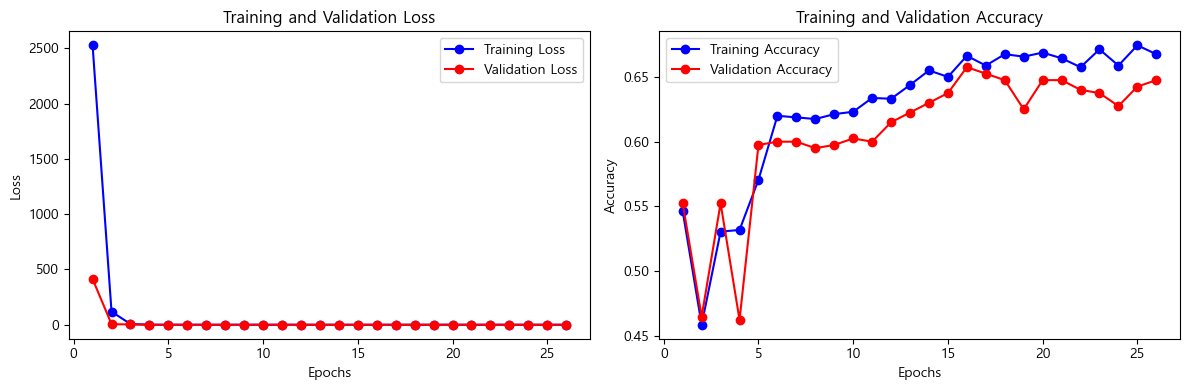

In [230]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Loss 그래프
epochs = range(1, len(history.history['loss']) + 1)
axs[0].plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
axs[0].plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy 그래프
axs[1].plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
axs[1].plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


상관 관계 확인

             close_price  sentiment
close_price     1.000000  -0.010422
sentiment      -0.010422   1.000000


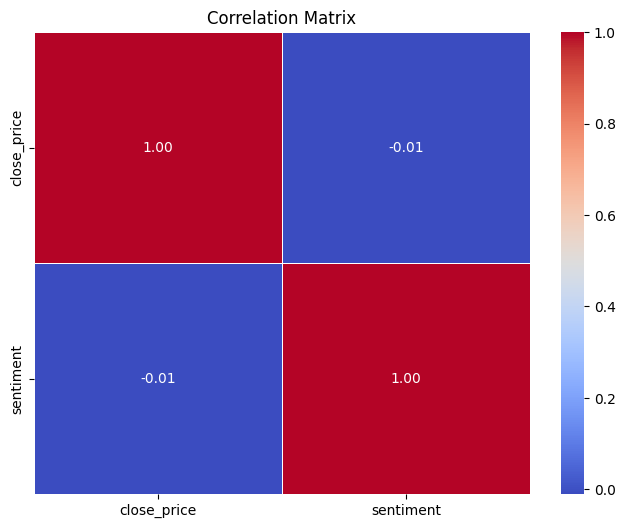

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import api as sm

# Load the data into a DataFrame
data = pd.read_csv('naver_bit_data_with_sentiment.csv')

# Select the columns of interest
columns_of_interest = ['close_price', 'sentiment']

# Create a correlation matrix
correlation = data[columns_of_interest].corr()

# Plot the correlation matrix
print(correlation)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

             close_price  sentiment
close_price     1.000000  -0.029627
sentiment      -0.029627   1.000000


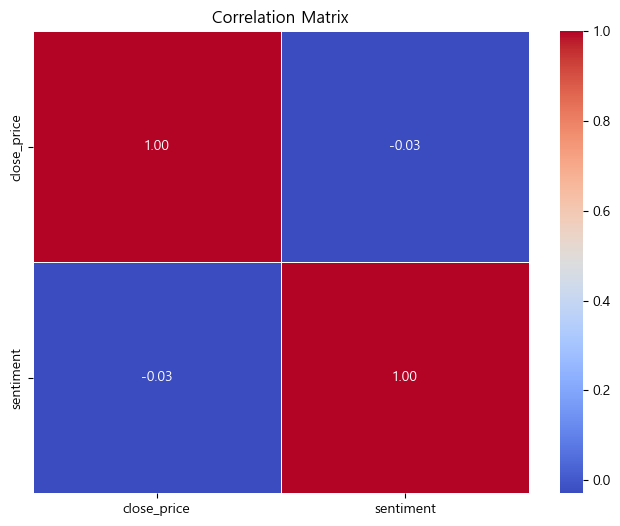

             close_price  sentiment
close_price     1.000000   0.029627
sentiment       0.029627   1.000000


In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import api as sm
from sklearn.preprocessing import MinMaxScaler

# Load the data into a DataFrame
data = pd.read_csv('naver_bit_data_with_sentiment.csv')

# Select the columns of interest
columns_of_interest = ['close_price', 'sentiment']

# Create a correlation matrix
correlation = data[columns_of_interest].corr()

# Plot the correlation matrix
print(correlation)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Preprocessing based on negative correlation
data['sentiment'] = -1 * data['sentiment']  # Invert the sentiment values

# Data scaling
scaler = MinMaxScaler()
data[columns_of_interest] = scaler.fit_transform(data[columns_of_interest])

# Verify the updated correlation
correlation = data[columns_of_interest].corr()
print(correlation)


뉴스 제목을 가지고 단어확인

In [232]:
import pandas as pd
from konlpy.tag import Twitter
import nltk

data = pd.read_csv('naver_bit_data_with_sentiment.csv')
title_list = data['news_title'].tolist()
title_text = ''
for each_line in title_list:
    title_text = title_text + each_line + '\n'
title_text

t = Twitter() #형태소
tokens_ko = t.morphs(title_text)
ko = nltk.Text(tokens_ko)
print(len(ko.tokens)) # 토큰 전체 개수
print(len(set(ko.tokens))) # 토큰 unique 개수

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
print(ko.vocab().most_common(200))

C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


28800
76
[('\n', 2000), ('비트코인', 1800), (',', 1600), ("'", 800), ('美', 800), ('…', 800), ('하락', 600), ('2만', 600), ('하', 600), ('회', 600), ('(', 600), ('종합', 600), (')', 600), ('SEC', 600), ('바이', 600), ('낸스', 600), ('제소', 600), ('한', 400), ('FOMC', 400), ('여파', 400), ('한때', 400), ('석', 400), ('달', 400), ('만에', 400), ('5천달러', 400), ('2', 400), ('미', 400), ('코인', 400), ('·', 400), ('CEO', 400), ('법무부', 200), ('2011년', 200), ('64만', 200), ('개', 200), ('해킹', 200), ('러시아인', 200), ('명', 200), ('기소', 200), ('"', 200), ('매달', 200), ('10~14%', 200), ('수익', 200), ('주겠다', 200), ('"…', 200), ('억대', 200), ('투자', 200), ('사기', 200), ('50', 200), ('대', 200), ('집유', 200), ('금융', 200), ('당국', 200), ('등록', 200), ('사업자', 200), ('까지', 200), ('예치', 200), ('서비스', 200), ('잇단', 200), ('출금', 200), ('중단', 200), ('6천달러', 200), ('보', 200), ('이어', 200), ('베이스', 200), ('도', 200), ('은', 200), ('반등', 200), ('챗', 200), ('GPT', 200), ('에', 200), ('밀린', 200), ('올해', 200), ('들어', 200), ('월', 200), ('기준', 200), ('첫', 200)

[('\n', 2000), ('비트코인', 1800), (',', 1600), ("'", 800), ('美', 800), ('…', 800), ('하락', 600), ('2만', 600), ('하', 600), ('회', 600), ('(', 600), ('종합', 600), (')', 600), ('SEC', 600), ('바이', 600), ('낸스', 600), ('제소', 600), ('한', 400), ('FOMC', 400), ('여파', 400), ('한때', 400), ('석', 400), ('달', 400), ('만에', 400), ('5천달러', 400), ('2', 400), ('미', 400), ('코인', 400), ('·', 400), ('CEO', 400), ('법무부', 200), ('2011년', 200), ('64만', 200), ('개', 200), ('해킹', 200), ('러시아인', 200), ('명', 200), ('기소', 200), ('"', 200), ('매달', 200), ('10~14%', 200), ('수익', 200), ('주겠다', 200), ('"…', 200), ('억대', 200), ('투자', 200), ('사기', 200), ('50', 200), ('대', 200), ('집유', 200), ('금융', 200), ('당국', 200), ('등록', 200), ('사업자', 200), ('까지', 200), ('예치', 200), ('서비스', 200), ('잇단', 200), ('출금', 200), ('중단', 200), ('6천달러', 200), ('보', 200), ('이어', 200), ('베이스', 200), ('도', 200), ('은', 200), ('반등', 200), ('챗', 200), ('GPT', 200), ('에', 200), ('밀린', 200), ('올해', 200), ('들어', 200), ('월', 200), ('기준', 200), ('첫', 200)]


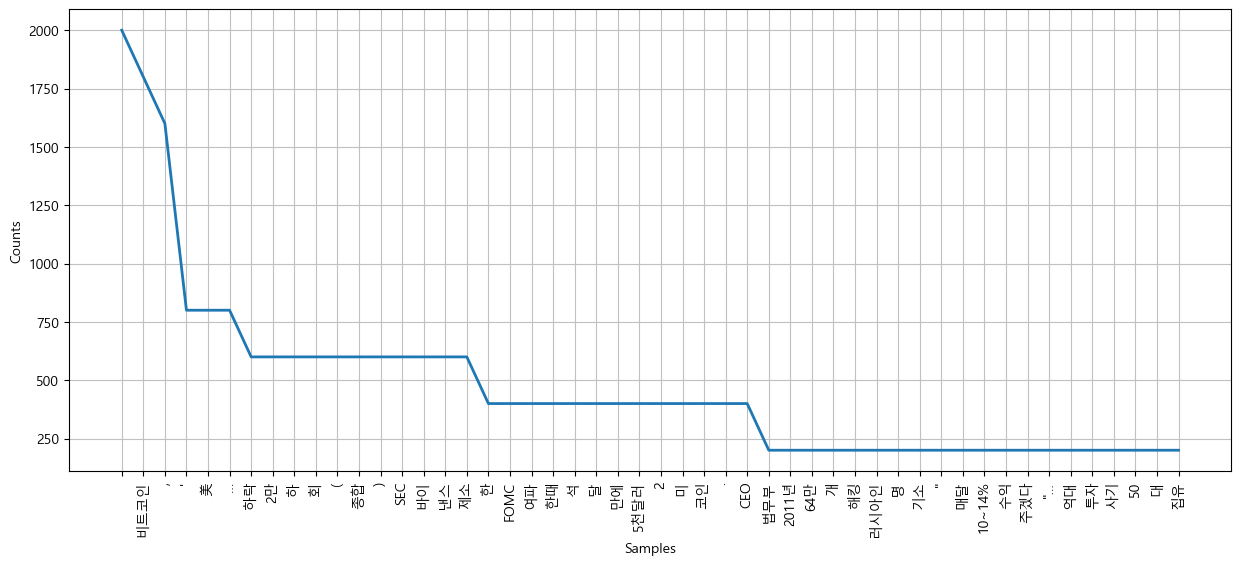

In [233]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
print(ko.vocab().most_common(200))
'''
stop_words = [
    [('비트코인', 2700), ('\n', 2499), (',', 2032), ("'", 1970), ('..', 1393), ('기대', 856), ('美', 813), ('[', 760), (']', 760), ('·', 736), ('은', 727), ('대형주', 689), ('부채', 665), ('협상', 595), ('"', 593), ('상승', 592), ('선', 562), ('주목', 541), ('FOMC', 534), ('증시', 529), ('와', 525), ('전자', 519), ('…', 511), ('코인', 490), ('한도', 473), ('시', 417), ('황', 406), ('횡보', 378), ('가격', 373), ('은행', 365), ('장', 362), ('주', 361), ('중', 350), ('삼성', 350), ('주춤', 349), ('필요', 349), ("',", 346), ('순환', 346), ('순', 345), ('환매', 343), ('다우', 343), ('골디락스', 342), ('2만', 299), ('하락', 264), ('?', 213), ('디폴트', 211), ('의', 210), ('7000달러', 208), ('뉴욕증시', 206), ('금리', 205), ('달러', 199), ('속보', 197), ('3600만원', 197), ('회복', 194), ('인상', 194), ('강세', 192), ('BTC', 192), ('적', 192), ('것', 190), ('우려', 189), ('27', 188), ('성', 188), ('타결', 187), ('오늘', 187), ('금', 186), ('앞두고', 186), ('k', 183), ('예상', 181), ('(', 181), (')', 181), ('vs', 181), ('발표', 180), ('에', 178), ('엔비디아', 178), ('뚝', 178), ('알트', 177), ('지표', 177), ('바이든', 177), ('등락', 177), ('큰', 176), ('보합', 176), ('폭발', 176), ('안정', 176), ('고용', 175), ('약', 175), ('국채', 175), ('포함', 174), ('주말', 173), ('곧', 173), ('추천', 173), ('기자회견', 173), ('의미', 173), ('반영', 172), ('대형', 172), ('구리', 172), ('현재상황', 171), ('활짝', 171), ('됐는데', 171), ('POSCO', 171), ('홀딩스', 171), ('더할', 171), ('삼', 171), ('한국', 171), ('...', 92), ('이', 87), ('브리핑', 67), ('피자', 60), ('대', 57), ('더', 56), ('화폐', 55), ('가상', 53), ('리움', 51), ('미국', 50), ('‘', 49), ('데이', 48), ('’', 46), ('전망', 37), ('반등', 36), ('로', 36), ('도', 36), ('”', 36), ('리플', 34), ('거래', 34), ('“', 34), ('자산', 33), ('합의', 33), ('상향', 33), ('미', 32), ('원대', 32), ('테더', 32), ('↑', 31), ('시세', 31), ('이벤트', 31), ('빗썸', 31), ('급락', 27), ('크립', 26), ('암호', 26), ('스', 26), ('..."', 25), ('세', 25), ('기념', 24), ('시장', 24), ('급등', 23), ('한', 23), ('약세', 23), ('바이', 22), ('낸스', 22), ('흔들', 21), ('에도', 21), ('돌파', 21), ('투자자', 21), ('규제', 21), ('지속', 21), ('경제', 21), ('위기', 21), ('토', 20), ('6000달러', 20), ('투자', 19), ('단기', 19), ('으로', 18), ('채굴', 18), ('분석', 17), ('↓', 17), ('인', 17), ('코빗', 17), ('매입', 17), ('연구소', 17), ('속', 17), ('NFT', 16), ('가', 16), ('가능성', 16), ('연', 16), ('테이블', 16), ('K', 16), ('7천달러', 15), ('CPI', 15), ('붕괴', 15), ('첫', 15), ('최저', 15), ('3600만', 15), ('준', 15), ('승인', 15), ('올해', 14), ('-', 14), ('권', 14), ('조정', 14), ('중단', 14), ('해야', 14), ('3500만원', 13), ('랠리', 13), ('두', 13), ('하는', 13), ("'…", 13), ('상승세', 13), ('"…', 13), ('3%', 13), ('발', 13), ('행사', 13), ('까지', 13), ('올', 12)]
]

tokens_ko = [each_word for each_word in tokens_ko
            if each_word not in stop_words]
'''
ko = nltk.Text(tokens_ko)

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

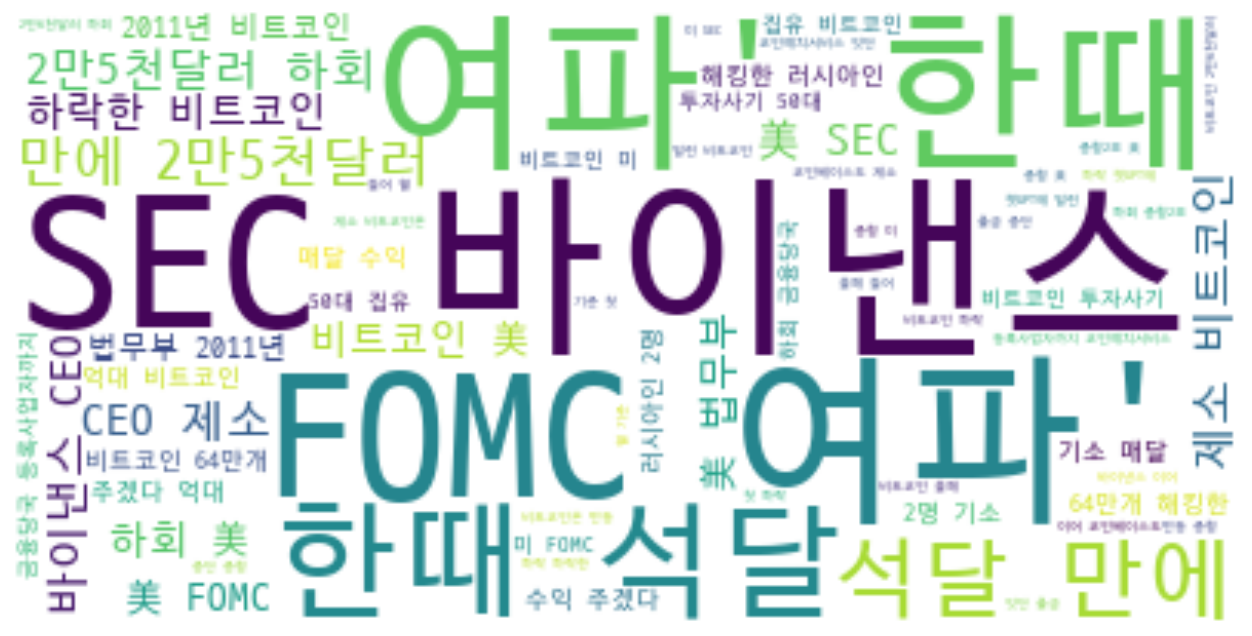

In [234]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(font_path=r"C:/Users/SW/Desktop/D2Coding-Ver1.3.2-20180524-all.ttc",
                      relative_scaling=0.2,
                      background_color='white').generate(title_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('naver_bit_data_with_sentiment.csv')

# 결측치 처리
data = data.dropna()
data.reset_index(drop=True, inplace=True)

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1, 1))

# 데이터 분할
X = data['Date']
y = data['sentiment'], scaled_data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop])

# 테스트 데이터 예측
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

print("Predicted value:", predicted)

In [9]:
X.info()
y.info()
model.summary()

<class 'pandas.core.series.Series'>
RangeIndex: 300 entries, 0 to 299
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
300 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close_price  300 non-null    float64
 1   sentiment    300 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
___

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data['sentiment'] = ""

# 데이터 준비
X = padded_sequences  # 패딩된 텍스트 데이터
y = []

# 'sentiment' 열의 값을 확인하고 감성 레이블 할당
for sentiment in data['sentiment']:
    if sentiment == '부정':
        y.append(0)
    elif sentiment == '중립':
        y.append(1)
    elif sentiment == '긍정':
        y.append(2)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화
model = LogisticRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 모델 평가
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


ValueError: Found input variables with inconsistent numbers of samples: [300, 0]

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
import tensorflow astf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.model import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping



SyntaxError: invalid syntax (2748630133.py, line 6)

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
vocab_size = 23882

#모델 생성
model =  Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(128, recurrent_dropout=0.2)))
model.add(Dense(3, activation='softmax'))

#모델 컴파일
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

import os

# 현재 작업 디렉토리를 얻음
current_dir = os.getcwd()

# 모델 저장 디렉토리 경로 설정
model_dir = f'{current_dir}/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# 모델 파일 경로 설정
model_path = f'{model_dir}/LSTM_bidirectional.model'
'''
#모델 저장
model_dir = f'{my_path}/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model_path = medel_dir + "/LSTM_bidirectional.model"
'''

ck = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=3)

#모델 훈련
history = model.fit(X_train, y_train,
                   epochs=20,
                   callbacks = [ck, es],
                   validation_split = 0.2)

NameError: name 'X_train' is not defined

In [ ]:
mecab = Mecab()
MAX_LEN = 70

def test_sentence(sentence, tokenizer, model_path):
    # tokenizing and padding
    sent = [mecab.morphs(sentence)]
    X = [word for word in sent if not word in stopwords]
    X_input = tokenizer.texts_to_sequences(X)
    X_input = pad_sequences(X_input, maxlen=MAX_LEN)
    # load best model
    model = load_model(model_path)
    # predict
    pred = np.argmax(model.predict(X_input))
    # result
    if pred == 1:
        result = "긍정"
    elif pred == 0:
        result = "중립"
    else:
        result = "부정"
    
    return result
